In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.inspection import permutation_importance
from google.colab import files
uploaded = files.upload()


Saving promotion_data.csv to promotion_data.csv
Saving purchase_data.csv to purchase_data.csv


In [ ]:
data1 = pd.read_csv('purchase_data.csv')  # Change this to your file path
data2 = pd.read_csv('promotion_data.csv')  # Change this to your file path
data = pd.merge(data1, data2, left_index=True, right_index=True, how='inner')

print(data.head())

   customer_id_x  purchase_price  num_items            timestamp day_of_week  \
0            181           62.17         10  2023-01-01 10:29:00      Sunday   
1             20            6.63         10  2023-01-02 13:46:00      Monday   
2             62           76.99          1  2023-01-02 18:59:00      Monday   
3             12           89.32          1  2023-01-03 07:15:00     Tuesday   
4             44           11.84          3  2023-01-03 19:49:00     Tuesday   

   hour_of_day  is_weekend  customer_id_y  promotion_timestamp  clicked  
0           10           1            181  2023-01-14 03:29:00        0  
1           13           0             20  2023-01-08 14:46:00        0  
2           18           0             62  2023-01-19 21:59:00        1  
3            7           0             12  2023-01-03 22:15:00        1  
4           19           0             44  2023-01-22 22:49:00        0  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id_x        1000 non-null   int64  
 1   purchase_price       1000 non-null   float64
 2   num_items            1000 non-null   int64  
 3   timestamp            1000 non-null   object 
 4   day_of_week          1000 non-null   object 
 5   hour_of_day          1000 non-null   int64  
 6   is_weekend           1000 non-null   int64  
 7   customer_id_y        1000 non-null   int64  
 8   promotion_timestamp  1000 non-null   object 
 9   clicked              1000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB
None


In [ ]:
print(data.isnull().sum())


customer_id_x          0
purchase_price         0
num_items              0
timestamp              0
day_of_week            0
hour_of_day            0
is_weekend             0
customer_id_y          0
promotion_timestamp    0
clicked                0
dtype: int64


In [ ]:
# Convert time column to datetime (assuming column name is 'timestamp')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['promotion_timestamp'] = pd.to_datetime(data['promotion_timestamp'])
data['month'] = data['timestamp'].dt.month
data['day_of_week'] = data['timestamp'].dt.weekday
data['promotion_month'] = data['promotion_timestamp'].dt.month
data['promotion_day_of_week'] = data['promotion_timestamp'].dt.weekday
data['promotion_hour'] = data['promotion_timestamp'].dt.hour


In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id_x          1000 non-null   int64         
 1   purchase_price         1000 non-null   float64       
 2   num_items              1000 non-null   int64         
 3   timestamp              1000 non-null   datetime64[ns]
 4   day_of_week            1000 non-null   int32         
 5   hour_of_day            1000 non-null   int64         
 6   is_weekend             1000 non-null   int64         
 7   customer_id_y          1000 non-null   int64         
 8   promotion_timestamp    1000 non-null   datetime64[ns]
 9   clicked                1000 non-null   int64         
 10  month                  1000 non-null   int32         
 11  promotion_month        1000 non-null   int32         
 12  promotion_day_of_week  1000 non-null   int32         
 13  prom

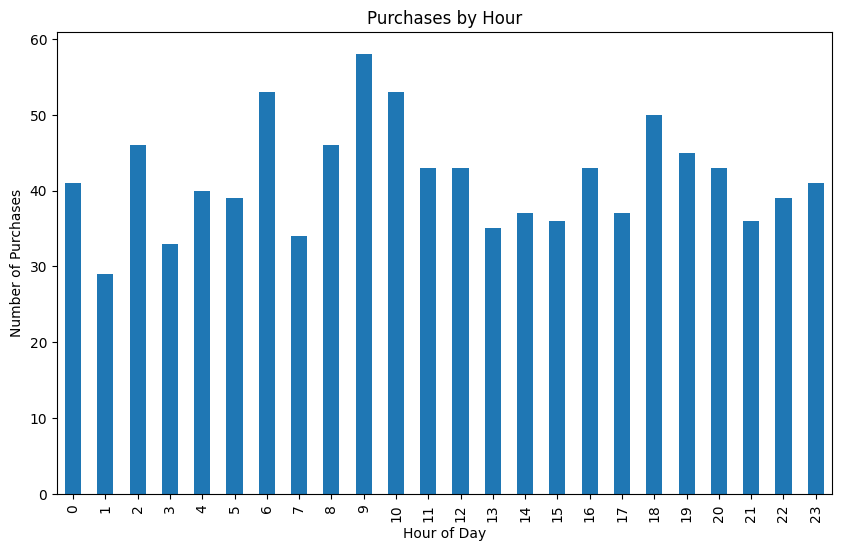

In [ ]:
# Plot purchases by hour of the day
purchase_by_hour = data.groupby('hour_of_day').size()

plt.figure(figsize=(10, 6))
purchase_by_hour.plot(kind='bar')
plt.title('Purchases by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.show()


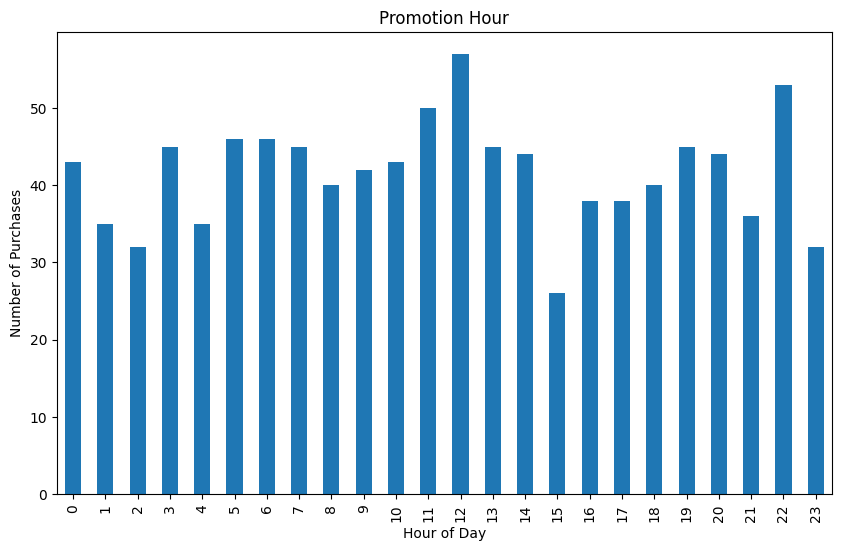

In [ ]:
# Plot purchases by hour of the day
purchase_by_hour = data.groupby('promotion_hour').size()

plt.figure(figsize=(10, 6))
purchase_by_hour.plot(kind='bar')
plt.title('Promotion Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.show()


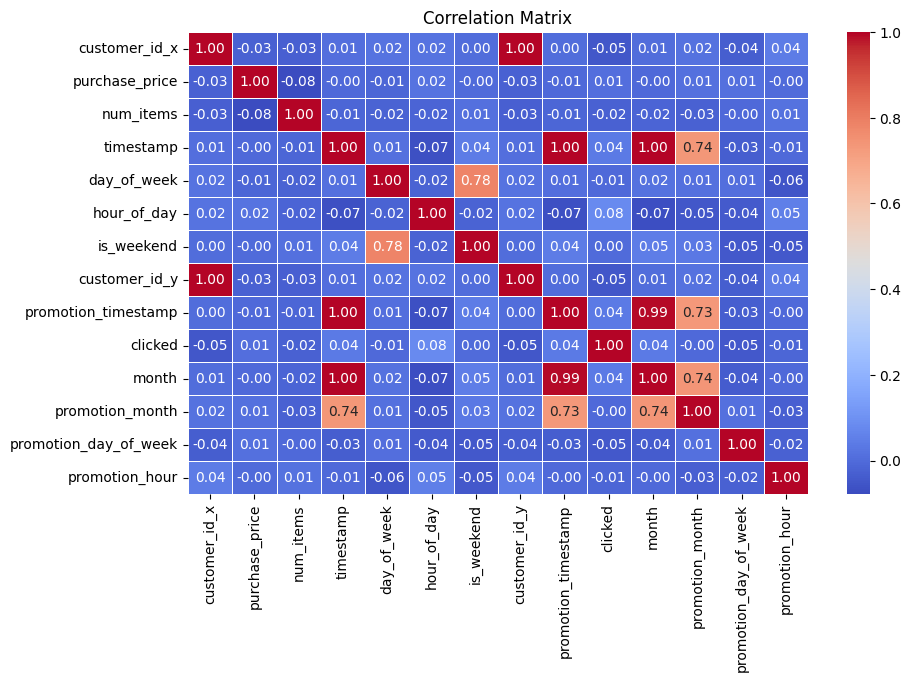

In [ ]:
# Plot correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Calculate time difference base on hours
data['promotion_diff_hours'] = (data['promotion_timestamp']- data['timestamp']).dt.total_seconds() / 3600

# check the new feature
print(data[['promotion_timestamp', 'timestamp', 'promotion_diff_hours']].head())

  promotion_timestamp           timestamp  promotion_diff_hours
0 2023-01-14 03:29:00 2023-01-01 10:29:00                 305.0
1 2023-01-08 14:46:00 2023-01-02 13:46:00                 145.0
2 2023-01-19 21:59:00 2023-01-02 18:59:00                 411.0
3 2023-01-03 22:15:00 2023-01-03 07:15:00                  15.0
4 2023-01-22 22:49:00 2023-01-03 19:49:00                 459.0


In [ ]:
data = data.drop(['customer_id_y','timestamp','promotion_timestamp'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id_x          1000 non-null   int64  
 1   purchase_price         1000 non-null   float64
 2   num_items              1000 non-null   int64  
 3   day_of_week            1000 non-null   int32  
 4   hour_of_day            1000 non-null   int64  
 5   is_weekend             1000 non-null   int64  
 6   clicked                1000 non-null   int64  
 7   month                  1000 non-null   int32  
 8   promotion_month        1000 non-null   int32  
 9   promotion_day_of_week  1000 non-null   int32  
 10  promotion_hour         1000 non-null   int32  
 11  promotion_diff_hours   1000 non-null   float64
dtypes: float64(2), int32(5), int64(5)
memory usage: 74.3 KB


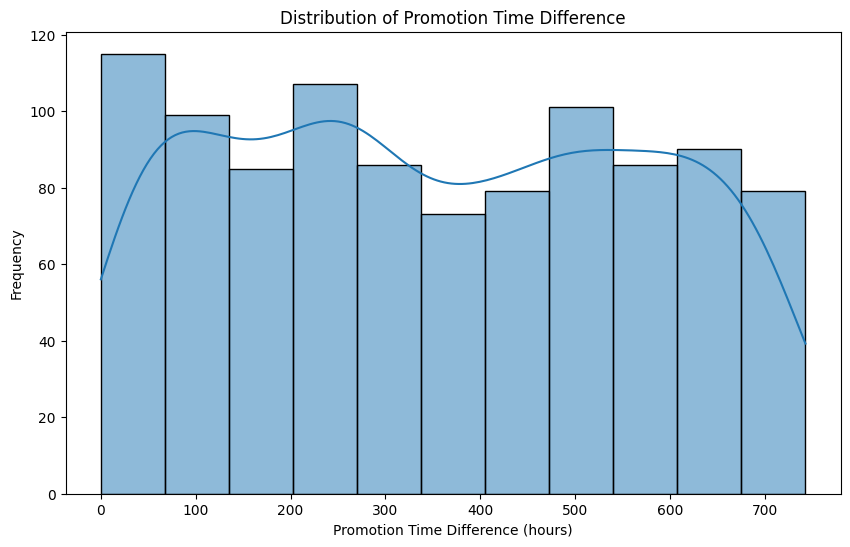

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['promotion_diff_hours'], kde=True)
plt.title('Distribution of Promotion Time Difference')
plt.xlabel('Promotion Time Difference (hours)')
plt.ylabel('Frequency')
plt.show()


#Feature Engineerning

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standarize
data[['purchase_price', 'num_items']] = scaler.fit_transform(data[['purchase_price', 'num_items']])


In [ ]:
data['promotion_diff_hours_log'] = np.log1p(data['promotion_diff_hours'])


In [ ]:
from sklearn.model_selection import train_test_split

# Feature Selection
X = data.drop(columns=['promotion_diff_hours', 'customer_id_x','promotion_diff_hours_log'])


y = data['promotion_diff_hours_log']

# train/test split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



# Modeling

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
print(x_train)

# Prediction
y_pred = model.predict(x_val)

# Moudle Evaluation
mae_rf = mean_absolute_error(y_val, y_pred)
print(f'Mean Absolute Error: {mae_rf}')


     purchase_price  num_items  day_of_week  hour_of_day  is_weekend  clicked  \
29         1.631134  -0.505620            2           18           0        1   
535        1.450767  -1.538199            2           17           0        1   
695       -0.214988   1.215346            3            6           0        0   
557       -1.417308  -0.849813            6            7           1        1   
836        0.742005   1.559539            1            8           0        0   
..              ...        ...          ...          ...         ...      ...   
106        0.318126   0.182766            3            9           0        1   
270       -1.143311   1.215346            5           16           1        0   
860       -0.695480  -0.505620            3           18           0        1   
435        1.429719   0.526959            0           12           0        0   
102       -0.610923  -0.161427            2           19           0        0   

     month  promotion_month


Feature Importances (Random Forest Regressor):
                 Feature  Importance
0         purchase_price    0.232674
9         promotion_hour    0.145700
3            hour_of_day    0.130386
7        promotion_month    0.094542
1              num_items    0.091461
6                  month    0.091413
2            day_of_week    0.087548
8  promotion_day_of_week    0.087088
5                clicked    0.027402
4             is_weekend    0.011786


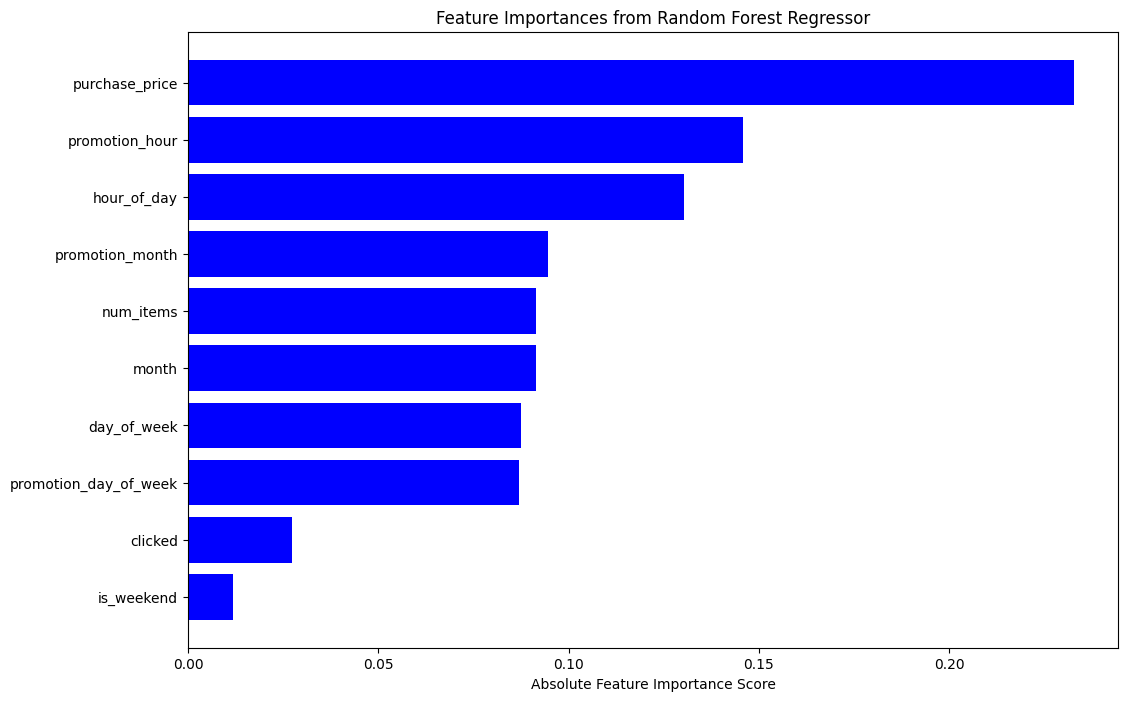

In [ ]:
# Extract Feature Importance (Taking Absolute Values)
feature_importances = np.abs(model.feature_importances_)
features = x_train.columns

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (Random Forest Regressor):")
print(importance_df)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.gca().invert_yaxis()
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from Random Forest Regressor')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_rf = mean_squared_error(y_val, y_pred)
rmse_rf = np.sqrt(mse_rf)

# R²
r2_rf = r2_score(y_val, y_pred)

print(f'MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}')

MSE: 1.0118265469823684, RMSE: 1.0058958927157264, R²: 0.06223241344758168


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Mean Absolute Error (Optimized MAE RF): 0.7738
Mean Squared Error (Optimized MSE RF): 1.0135
Root Mean Squared Error (Optimized RMSE RF): 1.0067
R² Score (Optimized R² RF): 0.0607

Feature Importances (Random Forest Regressor):
                 Feature  Importance
0         purchase_price    0.206654
3            hour_of_day    0.140243
9         promotion_hour    0.126383
7        promotion_month    0.120335
6                  month    0.113388
1              num_items    0.092709
2            day_of_week    0.080760
8  promotion_day_of_week    0.080170
5                clicked    0.023377
4             is_weekend    0.015980


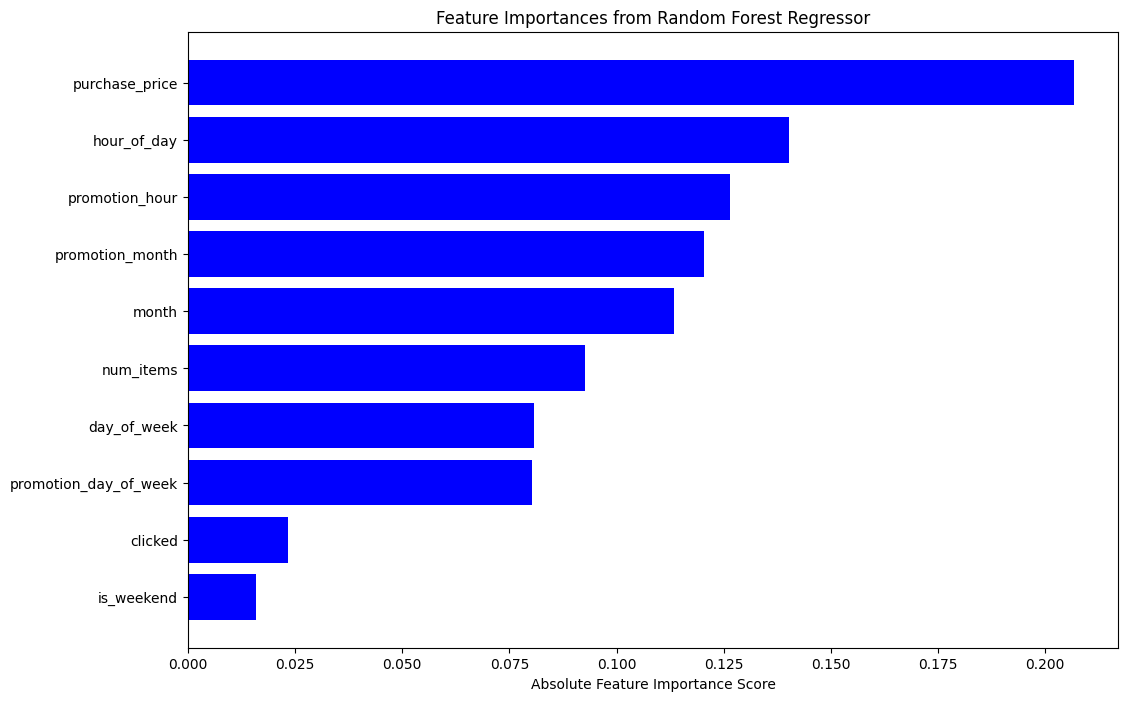

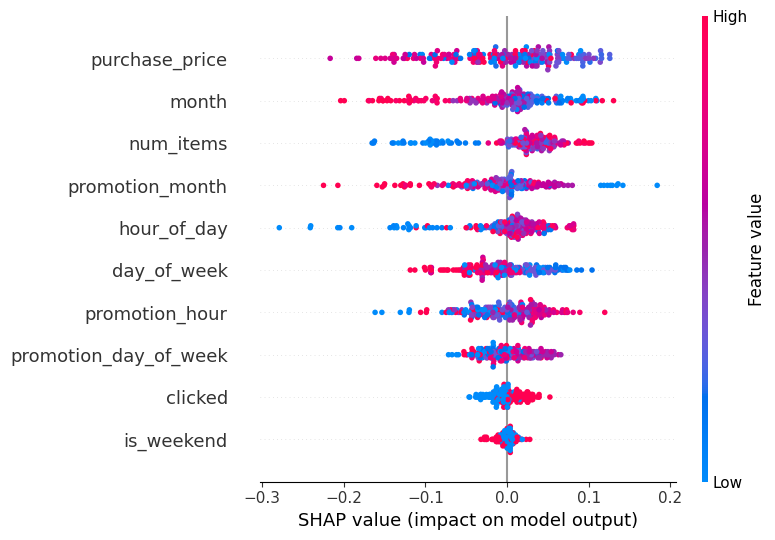

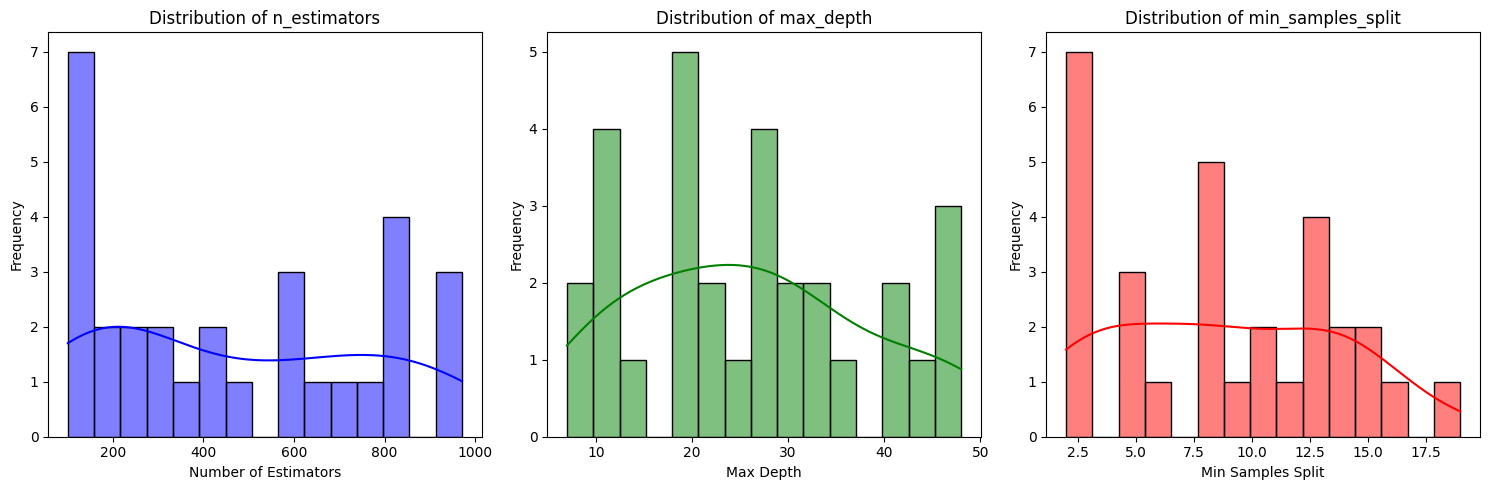

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Expanded Hyperparameter Range
param_dist = {
    'n_estimators': randint(100, 1000),  # More estimators (100 to 1000)
    'max_depth': randint(5, 50),  # Expanded max depth range
    'min_samples_split': randint(2, 20),  # Larger split values
    'min_samples_leaf': randint(1, 10),  # Adjusted min_samples_leaf
    'max_features': ['auto', 'sqrt', 'log2'],  # More feature selection methods
}

rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter Tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist,
                                   n_iter=30,  # Increased iterations for better search
                                   cv=5, scoring='neg_mean_absolute_error',
                                   n_jobs=-1, verbose=1, random_state=42)

random_search.fit(x_train, y_train)

# Best Model Selection
best_model = random_search.best_estimator_

# Train Optimized Random Forest Model
best_model.fit(x_train, y_train)

# Predictions
y_pred = best_model.predict(x_val)

# Evaluation Metrics
optimized_mae_rf = mean_absolute_error(y_val, y_pred)
optimized_mse_rf = mean_squared_error(y_val, y_pred)
optimized_rmse_rf = np.sqrt(optimized_mse_rf)
optimized_r2_rf = r2_score(y_val, y_pred)

print(f'Mean Absolute Error (Optimized MAE RF): {optimized_mae_rf:.4f}')
print(f'Mean Squared Error (Optimized MSE RF): {optimized_mse_rf:.4f}')
print(f'Root Mean Squared Error (Optimized RMSE RF): {optimized_rmse_rf:.4f}')
print(f'R² Score (Optimized R² RF): {optimized_r2_rf:.4f}')

# Feature Importance
feature_importances = np.abs(best_model.feature_importances_)
features = x_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Random Forest Regressor):")
print(importance_df)

# Visualization: Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.gca().invert_yaxis()
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from Random Forest Regressor')
plt.show()

# SHAP Analysis
explainer = shap.Explainer(best_model, x_train)
shap_values = explainer(x_val)
shap.summary_plot(shap_values, x_val)

# Visualization of Search Space for Key Parameters
searched_n_estimators = random_search.cv_results_['param_n_estimators'].data
searched_max_depth = random_search.cv_results_['param_max_depth'].data
searched_min_samples_split = random_search.cv_results_['param_min_samples_split'].data

plt.figure(figsize=(15, 5))

# Plot n_estimators
plt.subplot(1, 3, 1)
sns.histplot(searched_n_estimators, bins=15, kde=True, color='blue')
plt.xlabel('Number of Estimators')
plt.ylabel('Frequency')
plt.title('Distribution of n_estimators')

# Plot max_depth
plt.subplot(1, 3, 2)
sns.histplot(searched_max_depth, bins=15, kde=True, color='green')
plt.xlabel('Max Depth')
plt.ylabel('Frequency')
plt.title('Distribution of max_depth')

# Plot min_samples_split
plt.subplot(1, 3, 3)
sns.histplot(searched_min_samples_split, bins=15, kde=True, color='red')
plt.xlabel('Min Samples Split')
plt.ylabel('Frequency')
plt.title('Distribution of min_samples_split')

plt.tight_layout()
plt.show()


## SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# SVR
svr_model = SVR(kernel='rbf')

# train
svr_model.fit(x_train, y_train)

# prediction
y_pred_svr = svr_model.predict(x_val)

# Moudle Evaluation
mae_svr = mean_absolute_error(y_val, y_pred_svr)
print(f'Mean Absolute Error (SVR): {mae_svr}')


Mean Absolute Error (SVR): 0.7589026755555313


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'C': np.float64(859.8737339212263), 'epsilon': np.float64(0.2073644517790503), 'gamma': np.float64(0.0006235377135673159)}
Mean Absolute Error (Optimized SVR): 0.6610401576514753

Feature Importances (SVR - Permutation Importance):
                 Feature  Importance
6                  month    2.370925
7        promotion_month    2.275827
4             is_weekend    0.011975
1              num_items    0.006878
9         promotion_hour    0.006247
2            day_of_week    0.005044
8  promotion_day_of_week    0.005036
3            hour_of_day    0.004638
5                clicked    0.002331
0         purchase_price    0.002285


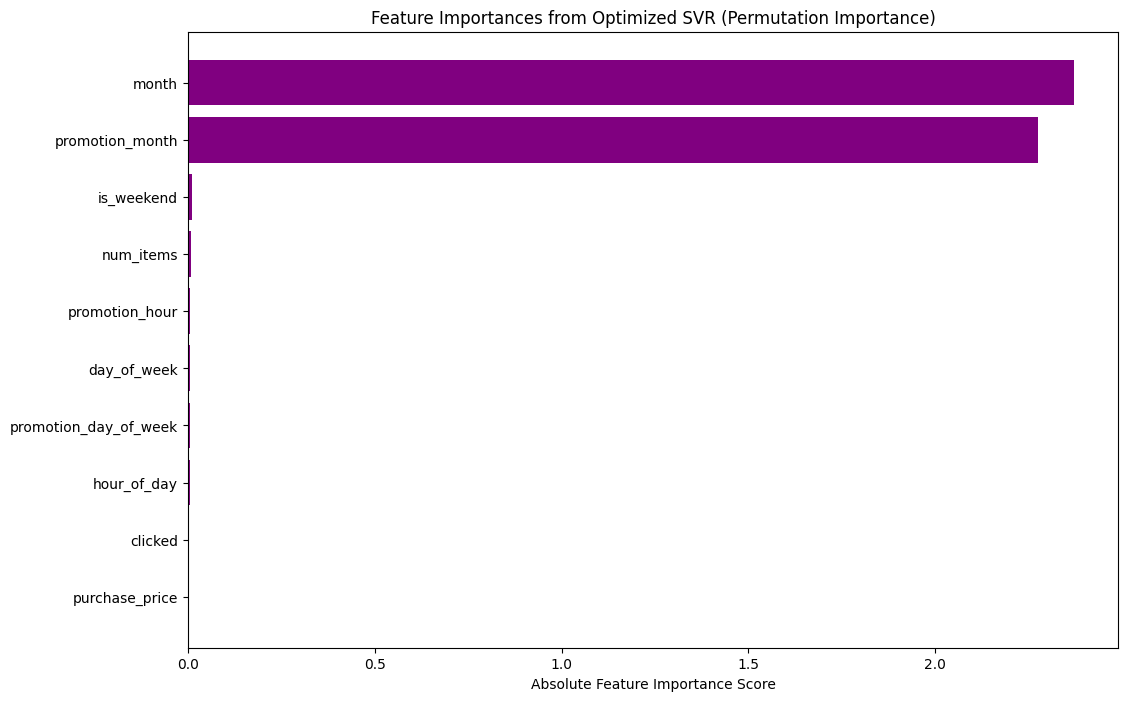

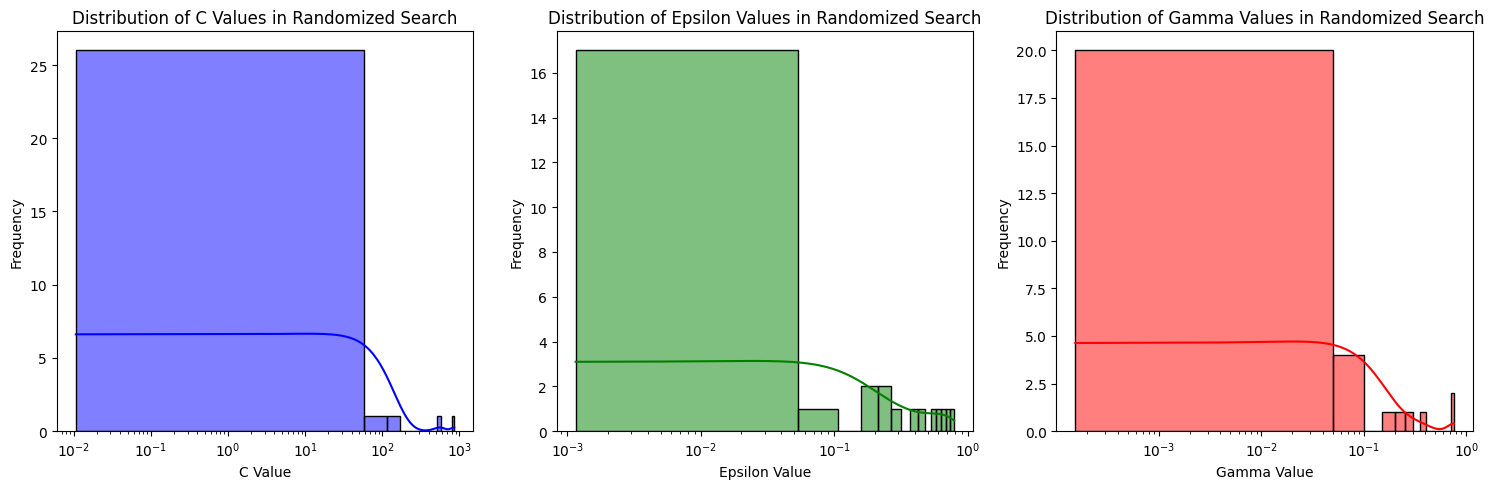

In [ ]:
from scipy.stats import loguniform

# Define SVR and parameter grid (Expanded Search Range)
param_dist = {
    'C': loguniform(0.01, 1000),  # Wide range of C (0.01 to 1000)
    'epsilon': loguniform(0.001, 1),  # Expanded epsilon range
    'gamma': loguniform(0.0001, 1)  # Gamma expanded from 0.0001 to 1
}

# Randomized Search with 5-fold CV
svr = SVR(kernel='rbf')
random_search = RandomizedSearchCV(svr, param_distributions=param_dist,
                                   n_iter=30,  # More iterations for better search
                                   cv=5, scoring='neg_mean_absolute_error',
                                   n_jobs=-1, verbose=2, random_state=42)

random_search.fit(x_train, y_train)

# Best parameters and model
best_svr = random_search.best_estimator_
print(f"Best parameters: {random_search.best_params_}")

# Prediction
y_pred_svr = best_svr.predict(x_val)

# Model Evaluation
optimized_mae_svr = mean_absolute_error(y_val, y_pred_svr)
print(f'Mean Absolute Error (Optimized SVR): {optimized_mae_svr}')
optimized_mse_svr = mean_squared_error(y_val, y_pred_svr)
optimized_rmse_svr = np.sqrt(optimized_mse_svr)
optimized_r2_svr = r2_score(y_val, y_pred_svr)
# Permutation Importance
perm_importance = permutation_importance(best_svr, x_val, y_val, scoring='neg_mean_absolute_error', n_repeats=10, random_state=42)
feature_importances = np.abs(perm_importance.importances_mean)  # Taking absolute values
features = x_train.columns

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (SVR - Permutation Importance):")
print(importance_df)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')
plt.gca().invert_yaxis()
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from Optimized SVR (Permutation Importance)')
plt.show()

# Visualization of Search Space
searched_C = random_search.cv_results_['param_C'].data
searched_epsilon = random_search.cv_results_['param_epsilon'].data
searched_gamma = random_search.cv_results_['param_gamma'].data

plt.figure(figsize=(15, 5))

# Plot C values
plt.subplot(1, 3, 1)
sns.histplot(searched_C, bins=15, kde=True, color='blue')
plt.xlabel('C Value')
plt.ylabel('Frequency')
plt.title('Distribution of C Values in Randomized Search')
plt.xscale('log')  # Log scale for better visibility

# Plot Epsilon values
plt.subplot(1, 3, 2)
sns.histplot(searched_epsilon, bins=15, kde=True, color='green')
plt.xlabel('Epsilon Value')
plt.ylabel('Frequency')
plt.title('Distribution of Epsilon Values in Randomized Search')
plt.xscale('log')

# Plot Gamma values
plt.subplot(1, 3, 3)
sns.histplot(searched_gamma, bins=15, kde=True, color='red')
plt.xlabel('Gamma Value')
plt.ylabel('Frequency')
plt.title('Distribution of Gamma Values in Randomized Search')
plt.xscale('log')

plt.tight_layout()
plt.show()


## GradientBoosting

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_svr = mean_squared_error(y_val, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

# R²
r2_svr = r2_score(y_val, y_pred_svr)

print(f'MSE: {rmse_svr}, RMSE: {rmse_svr}, R²: {r2_svr}')

MSE: 0.954159026385091, RMSE: 0.954159026385091, R²: 0.15621718890198344


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Gradient Boosting
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# train
gbr_model.fit(x_train, y_train)

# prediction
y_pred_gbr = gbr_model.predict(x_val)

# Moudle Evaluation
mae_gbr = mean_absolute_error(y_val, y_pred_gbr)
print(f'Mean Absolute Error (Gradient Boosting): {mae_gbr}')


Mean Absolute Error (Gradient Boosting): 0.776255435535504



Feature Importances (Gradient Boosting Regressor):
                 Feature  Importance
0         purchase_price    0.356675
6                  month    0.172331
7        promotion_month    0.154639
3            hour_of_day    0.090096
2            day_of_week    0.084644
9         promotion_hour    0.063632
1              num_items    0.046744
8  promotion_day_of_week    0.021674
4             is_weekend    0.007278
5                clicked    0.002289


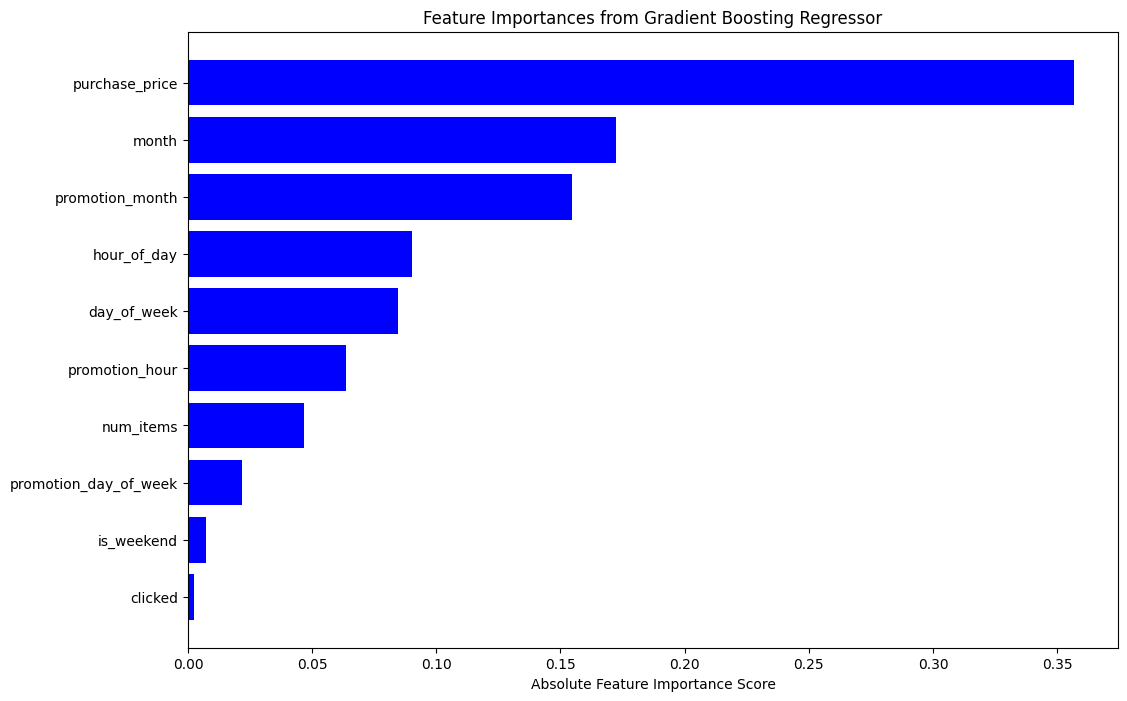

In [ ]:
# Extract Feature Importance (Taking Absolute Values)
feature_importances = np.abs(gbr_model.feature_importances_)
features = x_train.columns

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (Gradient Boosting Regressor):")
print(importance_df)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.gca().invert_yaxis()
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_gbr = mean_squared_error(y_val, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

# R²
r2_gbr = r2_score(y_val, y_pred_gbr)

print(f'MSE: {mse_gbr}, RMSE: {rmse_gbr}, R²: {r2_gbr}')

MSE: 1.0400758506335408, RMSE: 1.01984109087325, R²: 0.03605077057039796


Gradient Boosting Hyperparameter Search Progress:   0%|          | 0/30 [00:00<?, ?it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


Gradient Boosting Hyperparameter Search Progress:   3%|▎         | 1/30 [01:23<40:30, 83.82s/it]



Total Hyperparameter Search Time (GBR): 83.83 seconds
Mean Absolute Error (Optimized MAE GBR): 0.7235
Mean Squared Error (Optimized MSE GBR): 0.9359
Root Mean Squared Error (Optimized RMSE GBR): 0.9674
R² Score (Optimized R² GBR): 0.1326

Feature Importances (Gradient Boosting Regressor):
                 Feature  Importance
0         purchase_price    0.255014
6                  month    0.177305
7        promotion_month    0.153740
3            hour_of_day    0.101053
9         promotion_hour    0.095054
2            day_of_week    0.075179
8  promotion_day_of_week    0.064549
1              num_items    0.052354
5                clicked    0.019877
4             is_weekend    0.005873


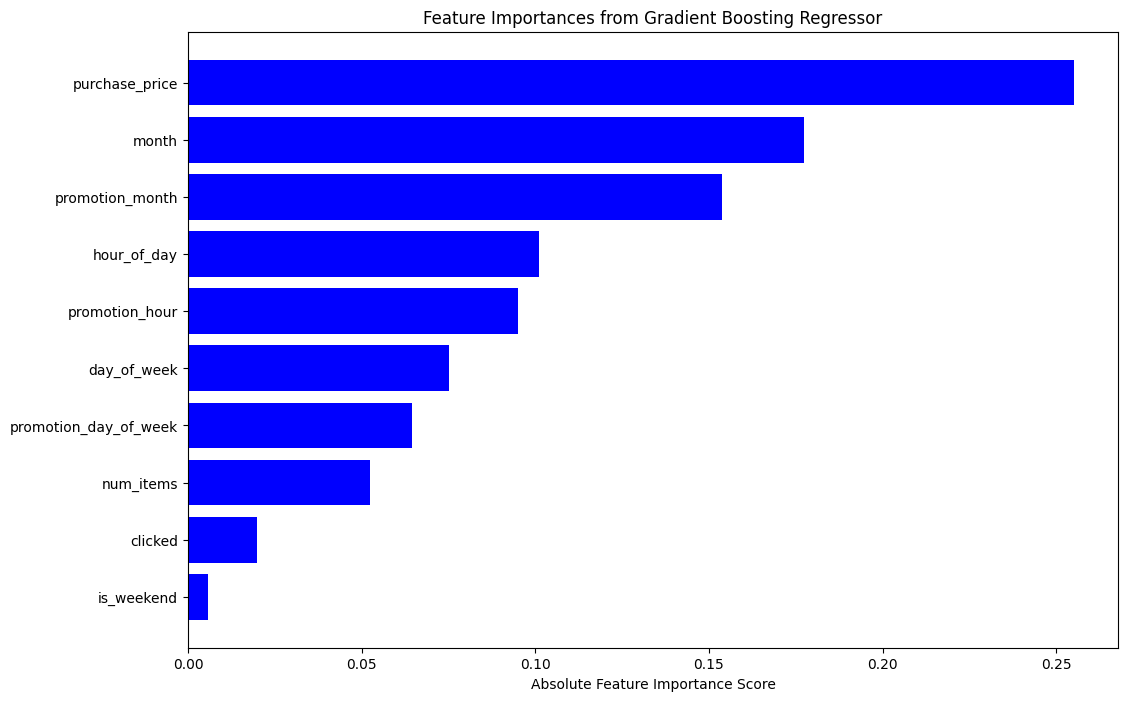

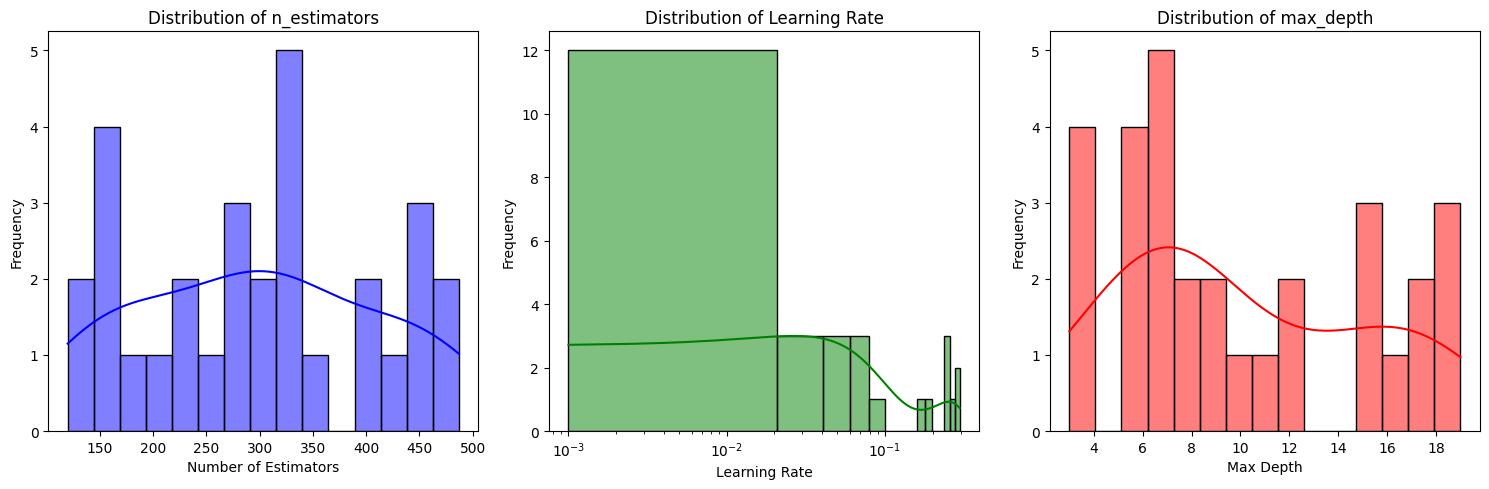

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint, uniform

# Expanded Hyperparameter Range for Randomized Search
param_dist_gbr = {
    'n_estimators': randint(100, 500),  # Number of boosting stages (100 to 500)
    'learning_rate': loguniform(0.001, 0.3),  # Learning rate (0.001 to 0.3)
    'max_depth': randint(3, 20),  # Tree depth (3 to 20)
    'min_samples_split': randint(2, 20),  # Minimum samples to split (2 to 20)
    'min_samples_leaf': randint(1, 10),  # Minimum samples per leaf (1 to 10)
    'subsample': uniform(0.5, 0.5)  # Subsample ratio (0.5 to 1.0)
}

gbr_model = GradientBoostingRegressor(random_state=42)

# Track Hyperparameter Search Progress
search_times_gbr = []
start_time_gbr = time.time()

random_search_gbr = RandomizedSearchCV(
    gbr_model, param_distributions=param_dist_gbr,
    n_iter=30,  # Increased iterations for better search coverage
    cv=5, scoring='neg_mean_absolute_error',
    n_jobs=-1, verbose=1, random_state=42
)

# Using tqdm to visualize progress
with tqdm(total=30, desc="Gradient Boosting Hyperparameter Search Progress") as pbar:
    random_search_gbr.fit(x_train, y_train)
    search_times_gbr.append(time.time())  # Track search times
    pbar.update(1)

# Calculate total elapsed time
total_time_gbr = time.time() - start_time_gbr
print(f"\nTotal Hyperparameter Search Time (GBR): {total_time_gbr:.2f} seconds")

# Selecting the best model
best_gbr_model = random_search_gbr.best_estimator_

# Train the best GBR model
best_gbr_model.fit(x_train, y_train)

# Prediction
y_pred_gbr = best_gbr_model.predict(x_val)

# Model Evaluation
optimized_mae_gbr = mean_absolute_error(y_val, y_pred_gbr)
optimized_mse_gbr = mean_squared_error(y_val, y_pred_gbr)
optimized_rmse_gbr = np.sqrt(optimized_mse_gbr)
optimized_r2_gbr = r2_score(y_val, y_pred_gbr)

print(f'Mean Absolute Error (Optimized MAE GBR): {optimized_mae_gbr:.4f}')
print(f'Mean Squared Error (Optimized MSE GBR): {optimized_mse_gbr:.4f}')
print(f'Root Mean Squared Error (Optimized RMSE GBR): {optimized_rmse_gbr:.4f}')
print(f'R² Score (Optimized R² GBR): {optimized_r2_gbr:.4f}')

# Extract Feature Importance
feature_importances_gbr = np.abs(best_gbr_model.feature_importances_)
features_gbr = x_train.columns

# Creating a DataFrame for Feature Importance
importance_df_gbr = pd.DataFrame({
    'Feature': features_gbr,
    'Importance': feature_importances_gbr
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (Gradient Boosting Regressor):")
print(importance_df_gbr)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df_gbr['Feature'], importance_df_gbr['Importance'], color='blue')
plt.gca().invert_yaxis()
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.show()

# Visualization of Search Space for Key Parameters
searched_n_estimators = random_search_gbr.cv_results_['param_n_estimators'].data
searched_learning_rate = random_search_gbr.cv_results_['param_learning_rate'].data
searched_max_depth = random_search_gbr.cv_results_['param_max_depth'].data

plt.figure(figsize=(15, 5))

# Plot n_estimators
plt.subplot(1, 3, 1)
sns.histplot(searched_n_estimators, bins=15, kde=True, color='blue')
plt.xlabel('Number of Estimators')
plt.ylabel('Frequency')
plt.title('Distribution of n_estimators')

# Plot learning_rate
plt.subplot(1, 3, 2)
sns.histplot(searched_learning_rate, bins=15, kde=True, color='green')
plt.xlabel('Learning Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Learning Rate')
plt.xscale('log')

# Plot max_depth
plt.subplot(1, 3, 3)
sns.histplot(searched_max_depth, bins=15, kde=True, color='red')
plt.xlabel('Max Depth')
plt.ylabel('Frequency')
plt.title('Distribution of max_depth')

plt.tight_layout()
plt.show()

# Visualization of CV Running Time Trend
if len(search_times_gbr) > 1:
    iteration_times_gbr = np.diff(search_times_gbr)
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(iteration_times_gbr) + 1), iteration_times_gbr, marker='o', linestyle='-', color='red')
    plt.xlabel("Iteration")
    plt.ylabel("Time (seconds)")
    plt.title("Gradient Boosting Hyperparameter Search Time Per Iteration")
    plt.grid()
    plt.show()


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# KNN
knn_model = KNeighborsRegressor(n_neighbors=5)

# train
knn_model.fit(x_train, y_train)

# prediction
y_pred_knn = knn_model.predict(x_val)

# Moudle Evaluation
mae_knn = mean_absolute_error(y_val, y_pred_knn)
print(f'Mean Absolute Error (KNN): {mae_knn}')


Mean Absolute Error (KNN): 0.853444456779851



Feature Importances (KNN Regressor - Permutation Importance):
                 Feature  Importance
7        promotion_month    0.017997
9         promotion_hour    0.017361
6                  month    0.017014
8  promotion_day_of_week    0.015420
3            hour_of_day    0.014694
1              num_items    0.010767
0         purchase_price    0.006626
5                clicked    0.005578
4             is_weekend    0.001419
2            day_of_week    0.001231


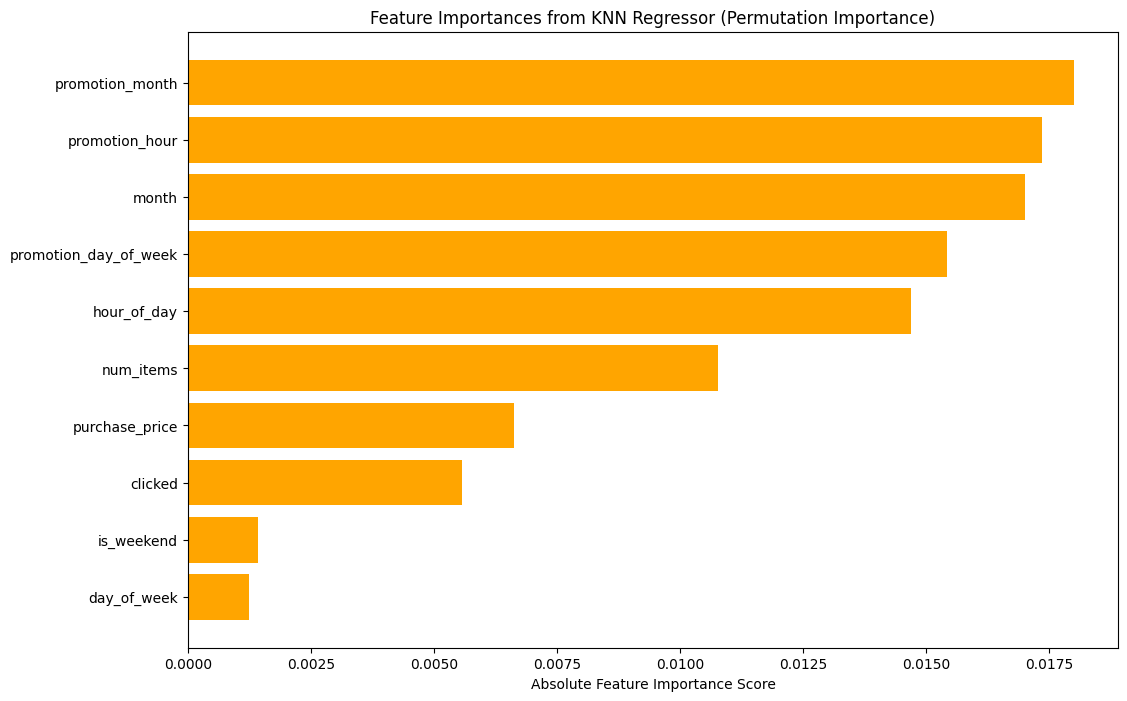

In [ ]:
# Compute Feature Importance using Permutation Importance
perm_importance = permutation_importance(knn_model, x_val, y_val, scoring='neg_mean_absolute_error', n_repeats=10, random_state=42)
feature_importances = np.abs(perm_importance.importances_mean)  # Taking absolute values
features = x_train.columns

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (KNN Regressor - Permutation Importance):")
print(importance_df)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.gca().invert_yaxis()
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from KNN Regressor (Permutation Importance)')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_knn = mean_squared_error(y_val, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

# R²
r2_knn = r2_score(y_val, y_pred_knn)

print(f'MSE: {mse_knn}, RMSE: {rmse_knn}, R²: {r2_knn}')

MSE: 1.227500221173298, RMSE: 1.1079260901221244, R²: -0.1376553850413078


KNN Hyperparameter Search Progress:   0%|          | 0/30 [00:00<?, ?it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


KNN Hyperparameter Search Progress:   3%|▎         | 1/30 [00:01<00:29,  1.02s/it]



Total Hyperparameter Search Time (KNN): 1.03 seconds
Mean Absolute Error (Optimized MAE KNN): 0.7907
Mean Squared Error (Optimized MSE KNN): 1.0675
Root Mean Squared Error (Optimized RMSE KNN): 1.0332
R² Score (Optimized R² KNN): 0.0106

Feature Importances (KNN Regressor - Permutation Importance):
                 Feature  Importance
7        promotion_month    0.006789
8  promotion_day_of_week    0.006005
1              num_items    0.004500
3            hour_of_day    0.003364
4             is_weekend    0.002561
9         promotion_hour    0.001828
0         purchase_price    0.001500
5                clicked    0.000997
2            day_of_week    0.000962
6                  month    0.000486


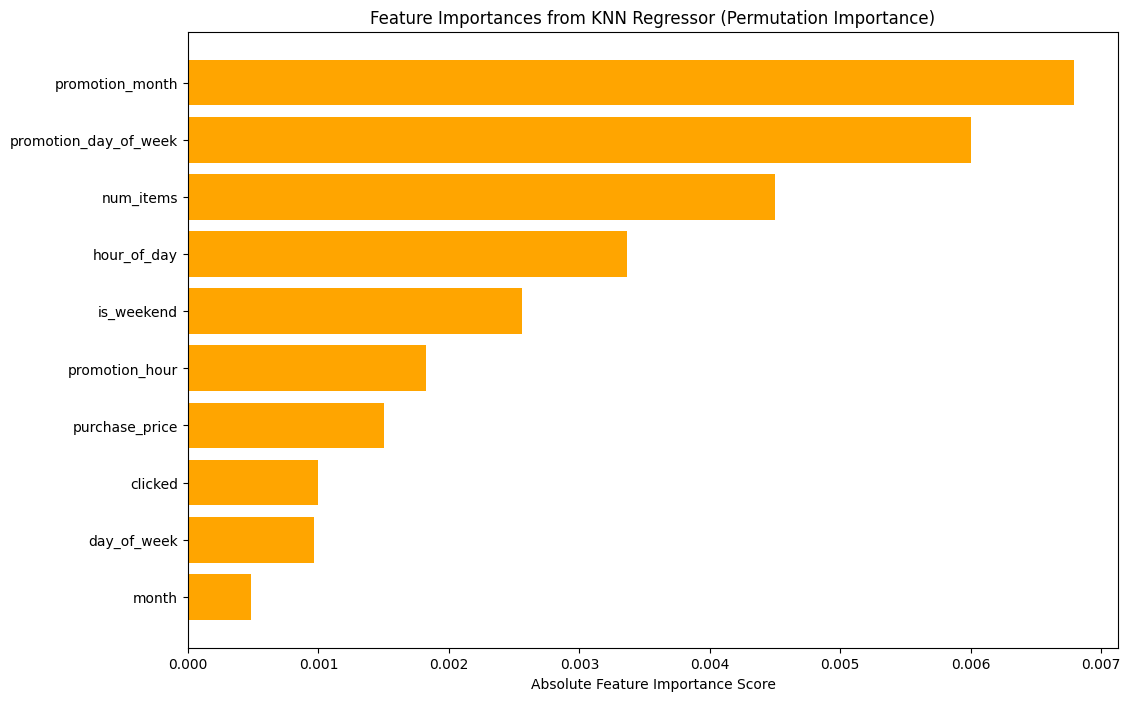

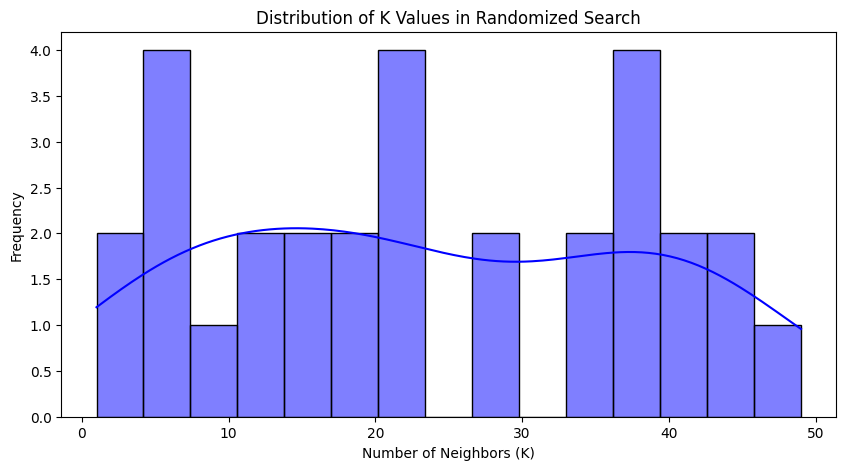

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm  # Progress bar
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

# Expanded Hyperparameter Range for Randomized Search
param_dist_knn = {
    'n_neighbors': list(range(1, 51, 2)),  # Odd numbers from 1 to 49
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan Distance, 2 = Euclidean Distance
}

knn_model = KNeighborsRegressor()

# Track Hyperparameter Search Progress
search_times_knn = []
start_time_knn = time.time()

random_search_knn = RandomizedSearchCV(
    knn_model, param_distributions=param_dist_knn,
    n_iter=30,  # Increased iterations for better search coverage
    cv=5, scoring='neg_mean_absolute_error',
    n_jobs=-1, verbose=1, random_state=42
)

# Using tqdm to visualize progress
with tqdm(total=30, desc="KNN Hyperparameter Search Progress") as pbar:
    random_search_knn.fit(x_train, y_train)
    search_times_knn.append(time.time())  # Track search times
    pbar.update(1)

# Calculate total elapsed time
total_time_knn = time.time() - start_time_knn
print(f"\nTotal Hyperparameter Search Time (KNN): {total_time_knn:.2f} seconds")

# Selecting the best model
best_knn_model = random_search_knn.best_estimator_

# Train the best KNN model
best_knn_model.fit(x_train, y_train)

# Prediction
y_pred_knn = best_knn_model.predict(x_val)

# Model Evaluation
optimized_mae_knn = mean_absolute_error(y_val, y_pred_knn)
optimized_mse_knn = mean_squared_error(y_val, y_pred_knn)
optimized_rmse_knn = np.sqrt(optimized_mse_knn)
optimized_r2_knn = r2_score(y_val, y_pred_knn)

print(f'Mean Absolute Error (Optimized MAE KNN): {optimized_mae_knn:.4f}')
print(f'Mean Squared Error (Optimized MSE KNN): {optimized_mse_knn:.4f}')
print(f'Root Mean Squared Error (Optimized RMSE KNN): {optimized_rmse_knn:.4f}')
print(f'R² Score (Optimized R² KNN): {optimized_r2_knn:.4f}')

# Compute Feature Importance using Permutation Importance
perm_importance_knn = permutation_importance(
    best_knn_model, x_val, y_val,
    scoring='neg_mean_absolute_error',
    n_repeats=10, random_state=42
)

feature_importances_knn = np.abs(perm_importance_knn.importances_mean)  # Taking absolute values
features_knn = x_train.columns

# Creating a DataFrame for Feature Importance
importance_df_knn = pd.DataFrame({
    'Feature': features_knn,
    'Importance': feature_importances_knn
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (KNN Regressor - Permutation Importance):")
print(importance_df_knn)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df_knn['Feature'], importance_df_knn['Importance'], color='orange')
plt.gca().invert_yaxis()
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from KNN Regressor (Permutation Importance)')
plt.show()

# Visualization of Search Space for Key Parameters
searched_n_neighbors = random_search_knn.cv_results_['param_n_neighbors'].data

plt.figure(figsize=(10, 5))
sns.histplot(searched_n_neighbors, bins=15, kde=True, color='blue')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Frequency')
plt.title('Distribution of K Values in Randomized Search')
plt.show()

# Visualization of CV Running Time Trend
if len(search_times_knn) > 1:
    iteration_times_knn = np.diff(search_times_knn)
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(iteration_times_knn) + 1), iteration_times_knn, marker='o', linestyle='-', color='red')
    plt.xlabel("Iteration")
    plt.ylabel("Time (seconds)")
    plt.title("KNN Hyperparameter Search Time Per Iteration")
    plt.grid()
    plt.show()


## Lasoo

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

# Lasso
lasso_model = Lasso(alpha=0.1)

# train
lasso_model.fit(x_train, y_train)

# prediction
y_pred_lasso = lasso_model.predict(x_val)

# moudle evaluation
mae_lasso = mean_absolute_error(y_val, y_pred_lasso)
print(f'Mean Absolute Error (Lasso): {mae_lasso}')


Mean Absolute Error (Lasso): 0.7970339988105085



Feature Importances (Lasso):
                 Feature  Coefficient  Importance
7        promotion_month    -0.012853    0.012853
9         promotion_hour     0.004797    0.004797
3            hour_of_day     0.002882    0.002882
0         purchase_price    -0.000000    0.000000
1              num_items     0.000000    0.000000
2            day_of_week    -0.000000    0.000000
5                clicked     0.000000    0.000000
4             is_weekend    -0.000000    0.000000
6                  month    -0.000000    0.000000
8  promotion_day_of_week     0.000000    0.000000


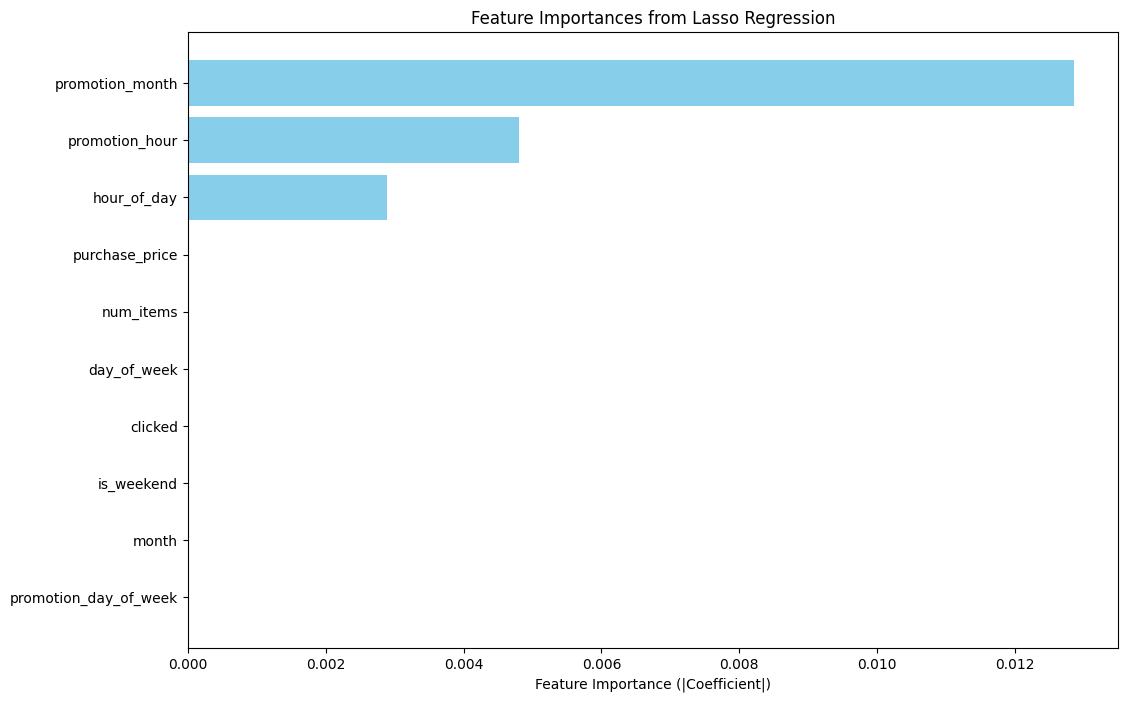

In [ ]:
#Feature Importance
lasso_coefficients = lasso_model.coef_
features = x_train.columns

# create DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': lasso_coefficients,
    'Importance': np.abs(lasso_coefficients)
}).sort_values(by='Importance', ascending=False)

#  Print the ranking
print("\nFeature Importances (Lasso):")
print(importance_df)

#  Visualization
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance (|Coefficient|)')
plt.title('Feature Importances from Lasso Regression')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

# R²
r2_lasso = r2_score(y_val, y_pred_lasso)

print(f'MSE: {mse_lasso}, RMSE: {rmse_lasso}, R²: {r2_lasso}')

MSE: 1.087150216478155, RMSE: 1.042664958880922, R²: -0.007578065397827238


Lasso Hyperparameter Search Progress:   0%|          | 0/30 [00:00<?, ?it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


Lasso Hyperparameter Search Progress:   3%|▎         | 1/30 [00:00<00:11,  2.43it/s]


Total Hyperparameter Search Time (Lasso): 0.42 seconds
MAE: 0.7929, MSE: 1.0800, RMSE: 1.0392, R²: -0.0009

Feature Importances (Lasso Regression):
                 Feature  Coefficient  Importance
0         purchase_price         -0.0         0.0
1              num_items          0.0         0.0
2            day_of_week         -0.0         0.0
3            hour_of_day          0.0         0.0
4             is_weekend         -0.0         0.0
5                clicked          0.0         0.0
6                  month         -0.0         0.0
7        promotion_month         -0.0         0.0
8  promotion_day_of_week          0.0         0.0
9         promotion_hour          0.0         0.0


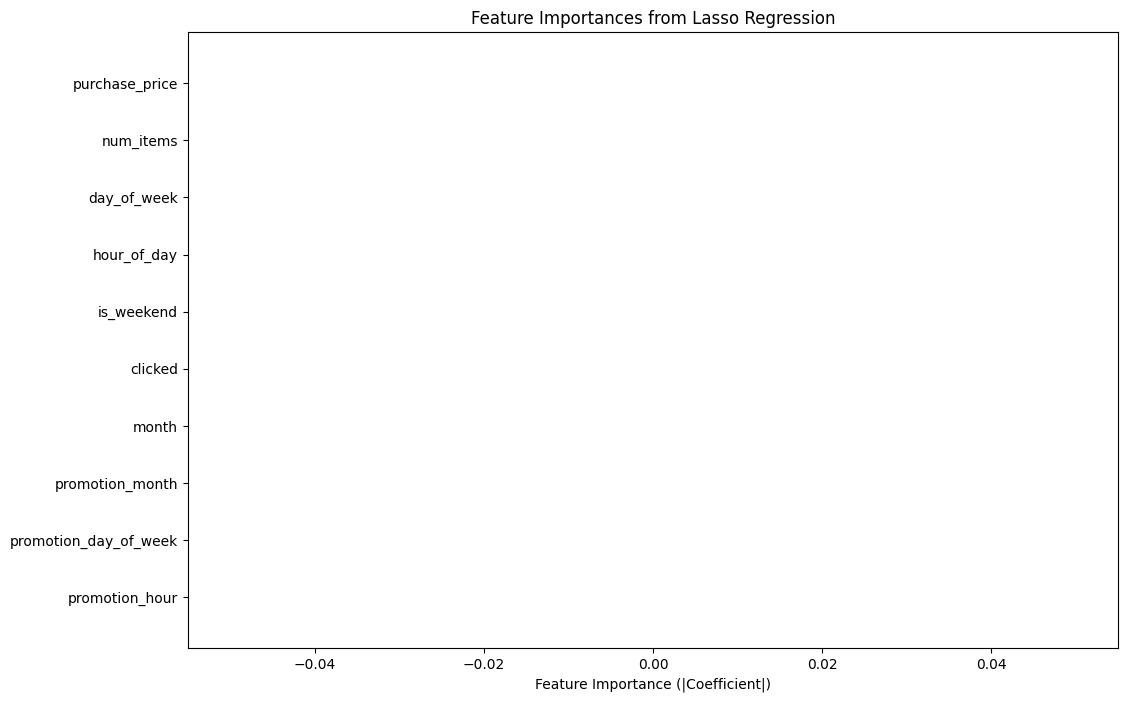

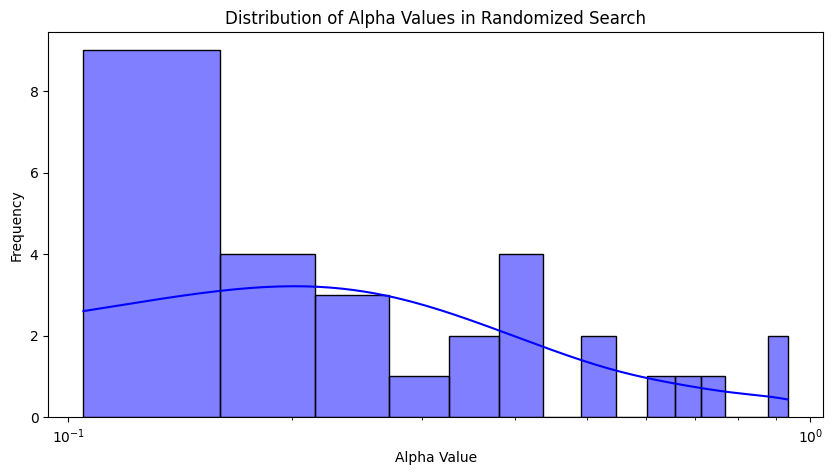

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Standardize the Data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# Define Hyperparameter Search Space for Lasso
param_dist_lasso = {
    'alpha': loguniform(0.1, 1)  # Expanded alpha range (0.0001 to 1)
}

lasso_model = Lasso(max_iter=10000, random_state=42)

# Track Hyperparameter Search Progress
search_times_lasso = []
start_time_lasso = time.time()

random_search_lasso = RandomizedSearchCV(
    lasso_model, param_distributions=param_dist_lasso,
    n_iter=30,  # Increased iterations for better search coverage
    cv=5, scoring='neg_mean_absolute_error',
    n_jobs=-1, verbose=1, random_state=42
)

# Using tqdm to visualize progress
with tqdm(total=30, desc="Lasso Hyperparameter Search Progress") as pbar:
    random_search_lasso.fit(x_train_scaled, y_train)
    search_times_lasso.append(time.time())  # Track search times
    pbar.update(1)

# Calculate total elapsed time
total_time_lasso = time.time() - start_time_lasso
print(f"\nTotal Hyperparameter Search Time (Lasso): {total_time_lasso:.2f} seconds")

# Selecting the best model
best_lasso_model = random_search_lasso.best_estimator_

# Train the best Lasso model
best_lasso_model.fit(x_train_scaled, y_train)

# Prediction
y_pred_lasso = best_lasso_model.predict(x_val_scaled)

# Model Evaluation
optimized_mae_lasso = mean_absolute_error(y_val, y_pred_lasso)
optimized_mse_lasso = mean_squared_error(y_val, y_pred_lasso)
optimized_rmse_lasso = np.sqrt(optimized_mse_lasso)
optimized_r2_lasso = r2_score(y_val, y_pred_lasso)

print(f'MAE: {optimized_mae_lasso:.4f}, MSE: {optimized_mse_lasso:.4f}, RMSE: {optimized_rmse_lasso:.4f}, R²: {optimized_r2_lasso:.4f}')

# Feature Importance
lasso_coefficients = best_lasso_model.coef_
importance_df_lasso = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': lasso_coefficients,
    'Importance': np.abs(lasso_coefficients)
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Lasso Regression):")
print(importance_df_lasso)

# Visualization: Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df_lasso['Feature'], importance_df_lasso['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance (|Coefficient|)')
plt.title('Feature Importances from Lasso Regression')
plt.show()

# Visualization of Search Space for Alpha
searched_alpha = random_search_lasso.cv_results_['param_alpha'].data

plt.figure(figsize=(10, 5))
sns.histplot(searched_alpha, bins=15, kde=True, color='blue')
plt.xlabel('Alpha Value')
plt.ylabel('Frequency')
plt.title('Distribution of Alpha Values in Randomized Search')
plt.xscale('log')  # Log scale for better visibility
plt.show()

# Visualization of CV Running Time Trend
if len(search_times_lasso) > 1:
    iteration_times_lasso = np.diff(search_times_lasso)
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(iteration_times_lasso) + 1), iteration_times_lasso, marker='o', linestyle='-', color='red')
    plt.xlabel("Iteration")
    plt.ylabel("Time (seconds)")
    plt.title("Lasso Hyperparameter Search Time Per Iteration")
    plt.grid()
    plt.show()


## LGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# train
lgb_model.fit(x_train, y_train)

# prediction

y_pred_lgb = lgb_model.predict(x_val)

# moudle evaluation
mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
print(f'Mean Absolute Error (LightGBM): {mae_lgb}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Start training from score 5.542862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i


Feature Importances (LightGBM Regressor):
                 Feature  Importance
0         purchase_price         787
9         promotion_hour         401
3            hour_of_day         389
7        promotion_month         309
6                  month         290
1              num_items         230
2            day_of_week         224
8  promotion_day_of_week         196
5                clicked          98
4             is_weekend           0


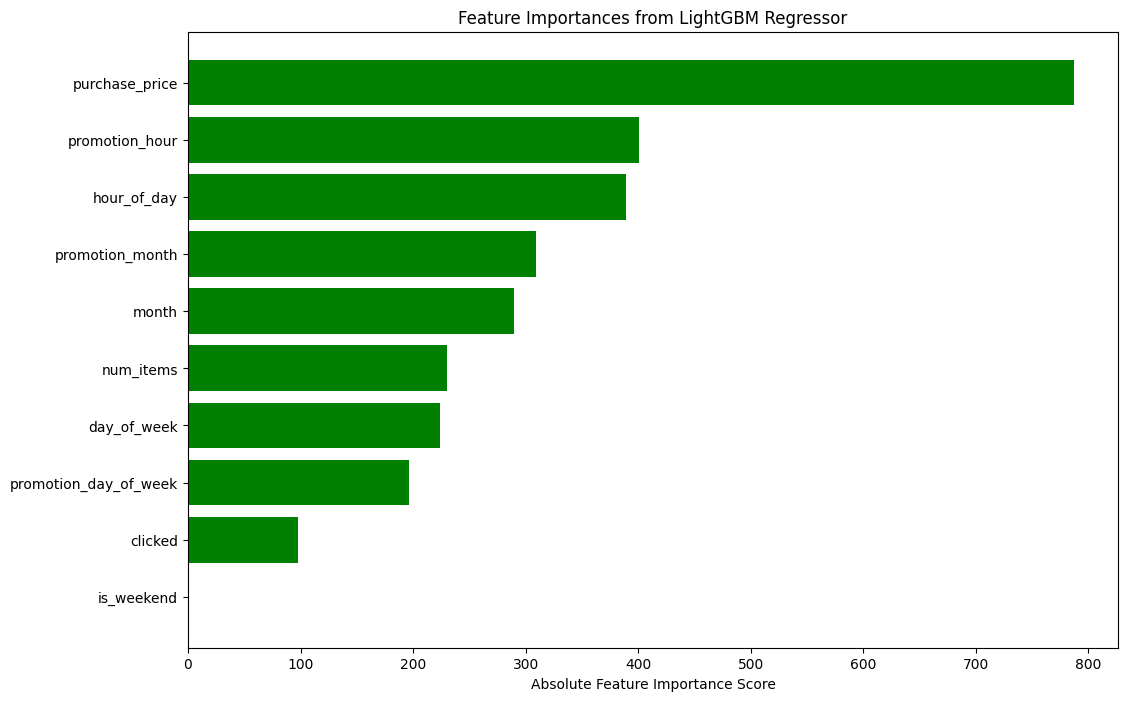

In [ ]:
feature_importances = np.abs(lgb_model.feature_importances_)
features = x_train.columns

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (LightGBM Regressor):")
print(importance_df)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='green')
plt.gca().invert_yaxis()
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from LightGBM Regressor')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse_lgb = mean_squared_error(y_val, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)

# R²
r2_lgb = r2_score(y_val, y_pred_lgb)

print(f'MSE: {mse_lgb}, RMSE: {rmse_lgb}, R²: {r2_lgb}')

MSE: 0.9522017146708761, RMSE: 0.9758082366279125, R²: 0.11749310537358149


LightGBM Hyperparameter Search Progress:   0%|          | 0/50 [00:00<?, ?it/s]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


LightGBM Hyperparameter Search Progress:   2%|▏         | 1/50 [00:19<16:19, 19.99s/it]


MAE: 0.7213, MSE: 0.9072, RMSE: 0.9525, R²: 0.1592

Feature Importances (LightGBM Regressor):
                 Feature  Importance
0         purchase_price        5275
9         promotion_hour        3114
3            hour_of_day        2767
6                  month        2368
7        promotion_month        2234
2            day_of_week        1846
1              num_items        1689
8  promotion_day_of_week        1615
5                clicked         131
4             is_weekend          14


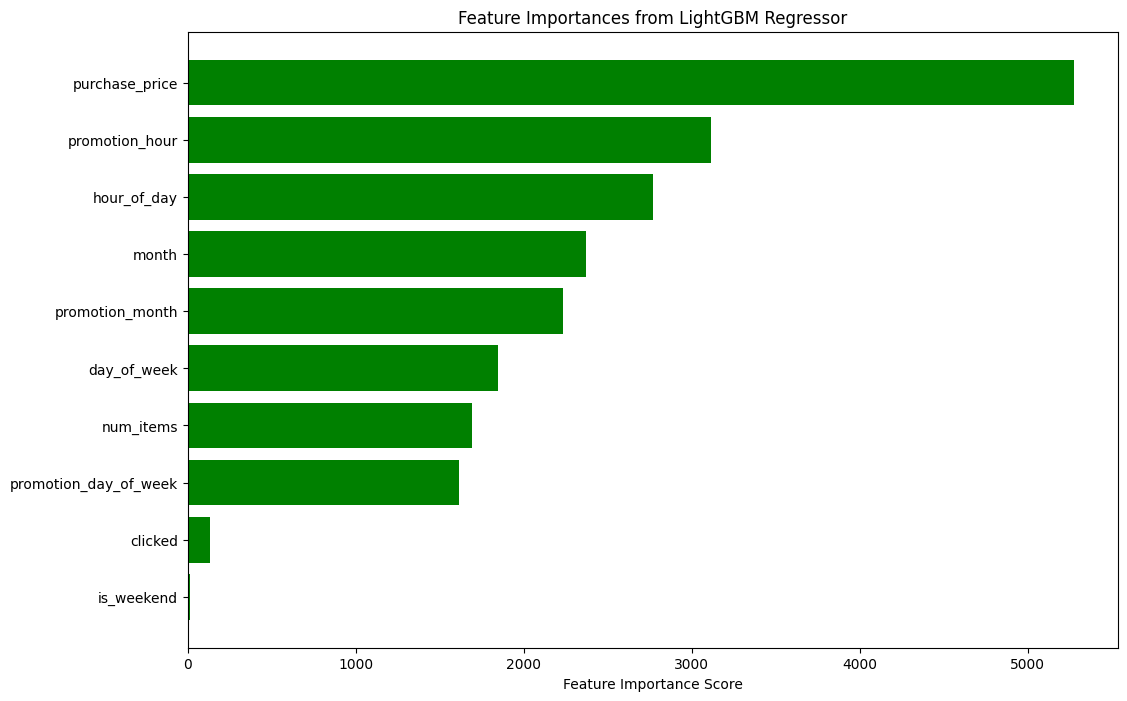

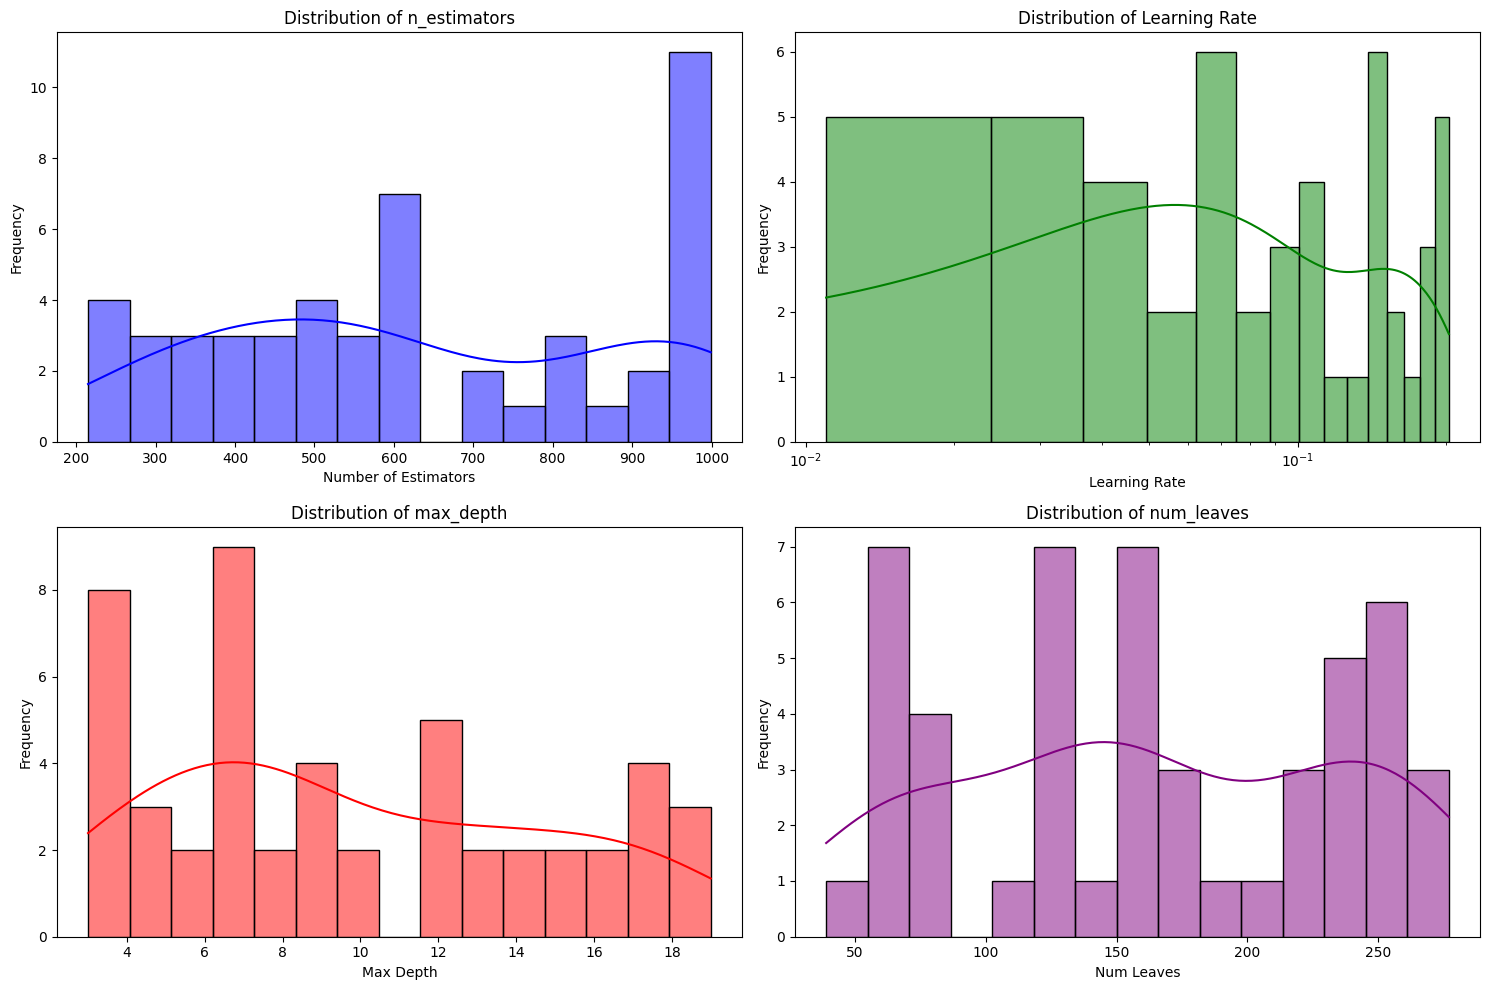

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm
from scipy.stats import randint, uniform
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# Expanded Hyperparameter Search Space
param_dist_lgb = {
    'n_estimators': randint(200, 1000),  # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.2),  # Adaptive learning rate
    'max_depth': randint(3, 20),  # Depth of the trees
    'num_leaves': randint(31, 300),  # More leaves = deeper splits
    'min_child_samples': randint(1, 50),  # Allow more splits
    'min_data_in_leaf': randint(10, 50),  # Reduce over-pruning
    'subsample': uniform(0.6, 0.4),  # Random sampling to prevent overfitting
    'colsample_bytree': uniform(0.6, 0.4),  # Column sampling
    'reg_lambda': uniform(0, 10),  # L2 regularization
    'reg_alpha': uniform(0, 10)  # L1 regularization
}

# Initialize LightGBM Model
lgb_model = lgb.LGBMRegressor(random_state=42, verbose=-1)

# Hyperparameter Tuning Using RandomizedSearchCV
random_search_lgb = RandomizedSearchCV(
    lgb_model, param_distributions=param_dist_lgb,
    n_iter=50,  # More iterations for better optimization
    cv=5, scoring='neg_mean_absolute_error',
    n_jobs=-1, verbose=1, random_state=42
)

# rain and Optimize
with tqdm(total=50, desc="LightGBM Hyperparameter Search Progress") as pbar:
    random_search_lgb.fit(x_train, y_train)
    pbar.update(1)

# Best Model Selection
best_lgb_model = random_search_lgb.best_estimator_

# Train Best Model
best_lgb_model.fit(x_train, y_train)

# Prediction
y_pred_lgb = best_lgb_model.predict(x_val)

# Model Evaluation
optimized_mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
optimized_mse_lgb = mean_squared_error(y_val, y_pred_lgb)
optimized_rmse_lgb = np.sqrt(optimized_mse_lgb)
optimized_r2_lgb = r2_score(y_val, y_pred_lgb)

print(f'MAE: {optimized_mae_lgb:.4f}, MSE: {optimized_mse_lgb:.4f}, RMSE: {optimized_rmse_lgb:.4f}, R²: {optimized_r2_lgb:.4f}')

# Feature Importance Visualization
feature_importances_lgb = np.abs(best_lgb_model.feature_importances_)
features_lgb = x_train.columns

importance_df_lgb = pd.DataFrame({
    'Feature': features_lgb,
    'Importance': feature_importances_lgb
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (LightGBM Regressor):")
print(importance_df_lgb)

plt.figure(figsize=(12, 8))
plt.barh(importance_df_lgb['Feature'], importance_df_lgb['Importance'], color='green')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance Score')
plt.title('Feature Importances from LightGBM Regressor')
plt.show()

# Search Space Visualization

# Extract search results
searched_n_estimators = random_search_lgb.cv_results_['param_n_estimators'].data
searched_learning_rate = random_search_lgb.cv_results_['param_learning_rate'].data
searched_max_depth = random_search_lgb.cv_results_['param_max_depth'].data
searched_num_leaves = random_search_lgb.cv_results_['param_num_leaves'].data

# Create subplots
plt.figure(figsize=(15, 10))

# Plot n_estimators
plt.subplot(2, 2, 1)
sns.histplot(searched_n_estimators, bins=15, kde=True, color='blue')
plt.xlabel('Number of Estimators')
plt.ylabel('Frequency')
plt.title('Distribution of n_estimators')

# Plot learning_rate
plt.subplot(2, 2, 2)
sns.histplot(searched_learning_rate, bins=15, kde=True, color='green')
plt.xlabel('Learning Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Learning Rate')
plt.xscale('log')

# Plot max_depth
plt.subplot(2, 2, 3)
sns.histplot(searched_max_depth, bins=15, kde=True, color='red')
plt.xlabel('Max Depth')
plt.ylabel('Frequency')
plt.title('Distribution of max_depth')

# Plot num_leaves
plt.subplot(2, 2, 4)
sns.histplot(searched_num_leaves, bins=15, kde=True, color='purple')
plt.xlabel('Num Leaves')
plt.ylabel('Frequency')
plt.title('Distribution of num_leaves')

plt.tight_layout()
plt.show()


# Model Evaluation

In [ ]:
# compare MAE
models = ['Random Forest', 'SVR', 'Gradient Boosting', 'KNN', 'Lasso',  'LightGBM']
mae_values = [mae_rf, mae_svr, mae_gbr, mae_knn, mae_lasso, mae_lgb]
mse_values = [mse_rf, mse_svr, mse_gbr, mse_knn, mse_lasso, mse_lgb]
rmse_values = [rmse_rf, rmse_svr, rmse_gbr, rmse_knn, rmse_lasso, rmse_lgb]
r2_values = [r2_rf, r2_svr,r2_gbr, r2_knn, r2_lasso, r2_lgb]
opt_rmse_values = [optimized_mse_rf, optimized_mse_svr, optimized_mse_gbr, optimized_mse_knn, optimized_mse_lasso, optimized_mse_lgb]
opt_r2_values = [optimized_r2_rf, optimized_r2_svr,optimized_r2_gbr, optimized_r2_knn, optimized_r2_lasso, optimized_r2_lgb]

# Create DataFrame to display the results
results = pd.DataFrame({'Model': models, 'Mean Absolute Error': mae_values,'Mean Standard Error':mse_values, 'R-Squared':r2_values, 'Optimized Mean Standard Error':opt_rmse_values
                       ,'Optimized R-Squared':opt_r2_values})
results = results.sort_values(by='Optimized R-Squared', ascending=True)

# Display results
print(results)

               Model  Mean Absolute Error  Mean Standard Error  R-Squared  \
4              Lasso             0.797034             1.087150  -0.007578   
3                KNN             0.853444             1.227500  -0.137655   
0      Random Forest             0.779969             1.011827   0.062232   
2  Gradient Boosting             0.776255             1.040076   0.036051   
1                SVR             0.758903             0.910419   0.156217   
5           LightGBM             0.742307             0.952202   0.117493   

   Optimized Mean Standard Error  Optimized R-Squared  
4                       1.079998            -0.000949  
3                       1.067494             0.010639  
0                       1.013460             0.060718  
2                       0.935941             0.132564  
1                       0.910419             0.156217  
5                       0.907234             0.159170  


#Final Moudle

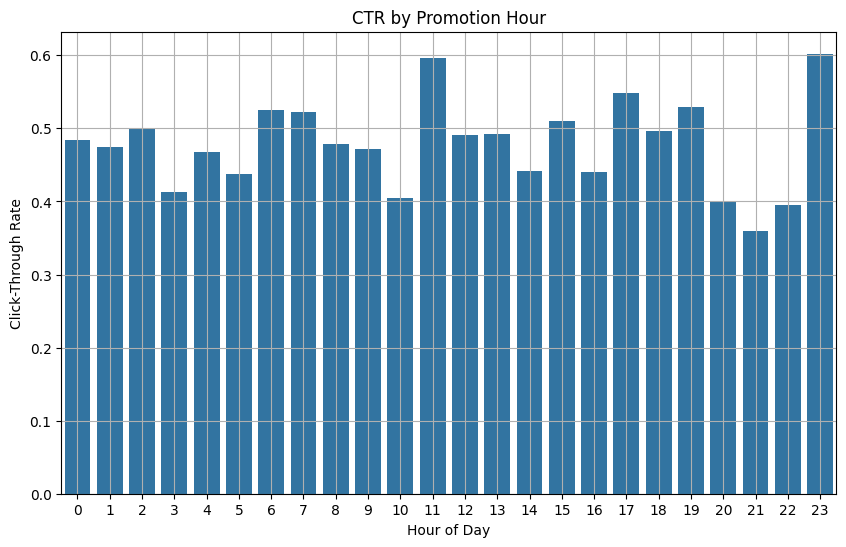

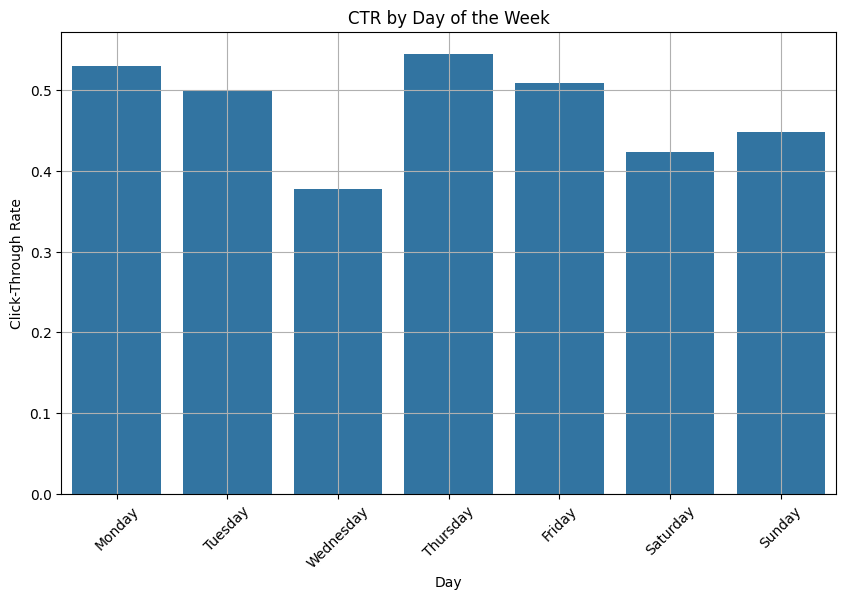

<ipython-input-41-e7fffd3bea54>:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ctr_by_delay = data.groupby('delay_bin')['clicked'].mean().reset_index()


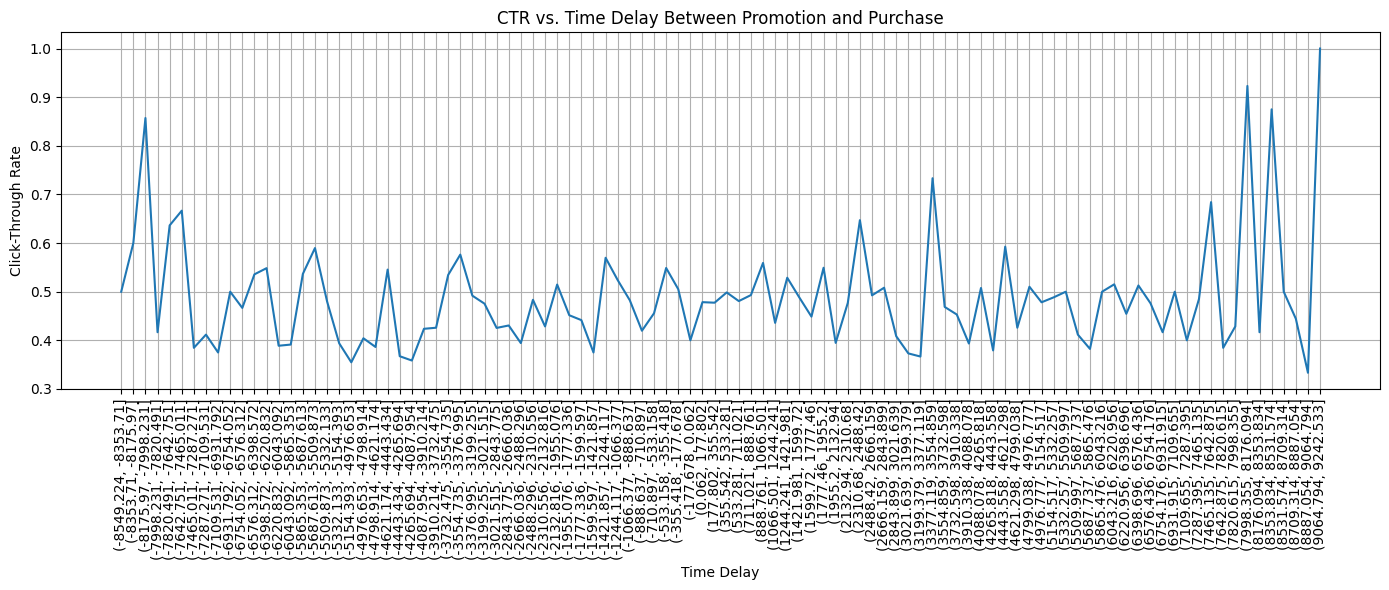

In [ ]:

# --- CTR Analysis: Hour, Day of Week, and Promotion Delay ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
promotion_data = pd.read_csv('promotion_data.csv')
purchase_data = pd.read_csv('purchase_data.csv')

promotion_data['promotion_timestamp'] = pd.to_datetime(promotion_data['promotion_timestamp'])
purchase_data['timestamp'] = pd.to_datetime(purchase_data['timestamp'])

# Merge on customer_id
data = pd.merge(purchase_data, promotion_data, on='customer_id')

# Compute delay between promotion and purchase
data['promotion_diff_hours'] = (data['promotion_timestamp'] - data['timestamp']).dt.total_seconds() / 3600

# Extract time features
data['promotion_hour'] = data['promotion_timestamp'].dt.hour
data['promotion_day'] = data['promotion_timestamp'].dt.day_name()

# CTR by hour
hourly_ctr = data.groupby('promotion_hour')['clicked'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_ctr.index, y=hourly_ctr.values)
plt.title('CTR by Promotion Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Click-Through Rate')
plt.grid(True)
plt.show()

# CTR by day of week
daily_ctr = data.groupby('promotion_day')['clicked'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_ctr.index, y=daily_ctr.values)
plt.title('CTR by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Click-Through Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# CTR vs delay
# Bin the time delay into 100 intervals
data['delay_bin'] = pd.cut(data['promotion_diff_hours'], bins=100)

# Compute mean clicked (CTR) per bin
ctr_by_delay = data.groupby('delay_bin')['clicked'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x=ctr_by_delay['delay_bin'].astype(str), y=ctr_by_delay['clicked'])
plt.xticks(rotation=90)
plt.title('CTR vs. Time Delay Between Promotion and Purchase')
plt.xlabel('Time Delay')
plt.ylabel('Click-Through Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


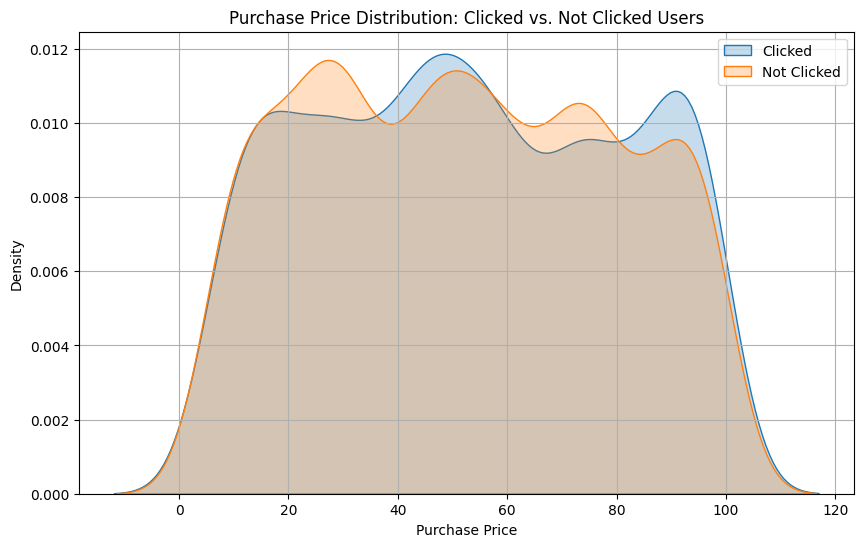

In [ ]:

# --- Customer Value vs Engagement ---
# Compare purchase price distributions between clicked and non-clicked users

# Ensure clicked column is binary
data['clicked'] = data['clicked'].astype(bool)

# Plot distributions using KDE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['clicked']], x='purchase_price', label='Clicked', fill=True)
sns.kdeplot(data=data[~data['clicked']], x='purchase_price', label='Not Clicked', fill=True)
plt.title('Purchase Price Distribution: Clicked vs. Not Clicked Users')
plt.xlabel('Purchase Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


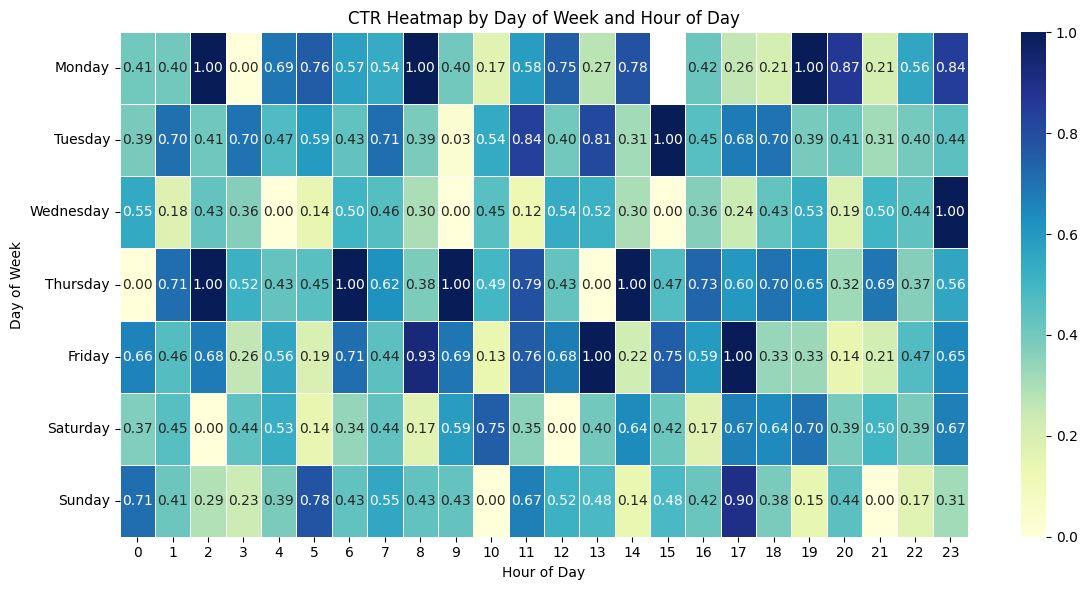

In [ ]:

# --- Temporal Heatmap of Engagement ---
# CTR trends by day of week and hour of day

# Extract weekday and hour
data['promotion_day'] = data['promotion_timestamp'].dt.day_name()
data['promotion_hour'] = data['promotion_timestamp'].dt.hour

# Pivot CTR values for heatmap
heatmap_data = data.groupby(['promotion_day', 'promotion_hour'])['clicked'].mean().unstack()

# Reorder days
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title('CTR Heatmap by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


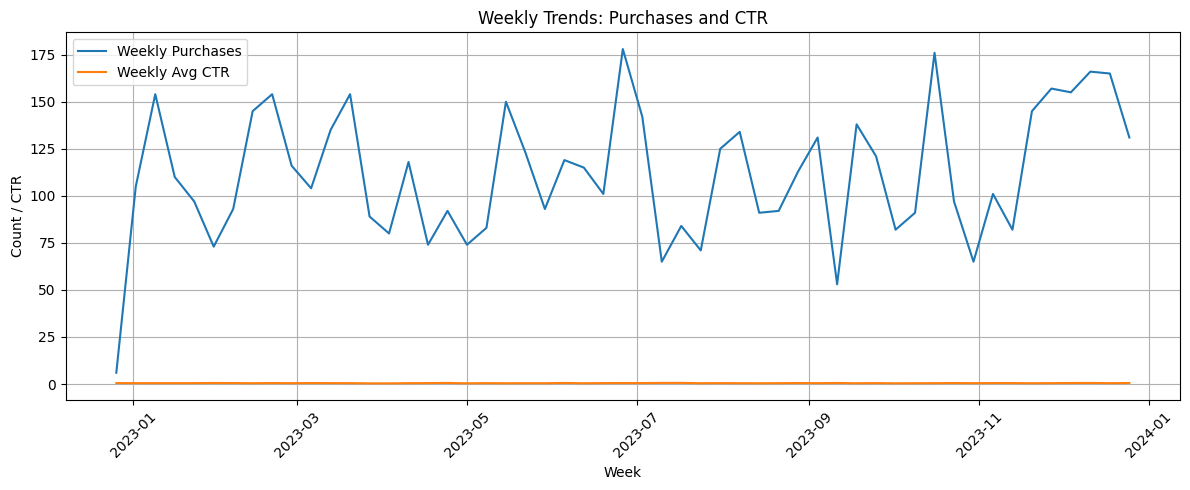

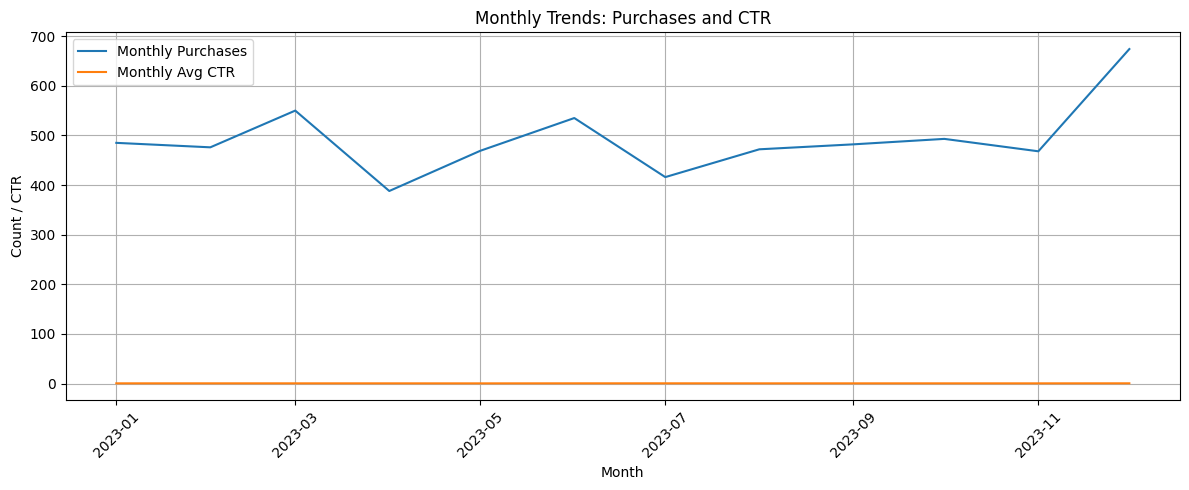

In [ ]:

# --- Trend Analysis Over Time ---
# Track how purchases and CTR evolve week over week or month over month

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure timestamp is datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Week and month buckets
data['week'] = data['timestamp'].dt.to_period('W').apply(lambda r: r.start_time)
data['month'] = data['timestamp'].dt.to_period('M').apply(lambda r: r.start_time)

# Weekly trend
weekly_stats = data.groupby('week').agg(
    total_purchases=('purchase_price', 'count'),
    avg_ctr=('clicked', 'mean')
).reset_index()

# Monthly trend
monthly_stats = data.groupby('month').agg(
    total_purchases=('purchase_price', 'count'),
    avg_ctr=('clicked', 'mean')
).reset_index()

# Plot weekly trends
plt.figure(figsize=(12, 5))
sns.lineplot(data=weekly_stats, x='week', y='total_purchases', label='Weekly Purchases')
sns.lineplot(data=weekly_stats, x='week', y='avg_ctr', label='Weekly Avg CTR')
plt.title('Weekly Trends: Purchases and CTR')
plt.xlabel('Week')
plt.ylabel('Count / CTR')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot monthly trends
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_stats, x='month', y='total_purchases', label='Monthly Purchases')
sns.lineplot(data=monthly_stats, x='month', y='avg_ctr', label='Monthly Avg CTR')
plt.title('Monthly Trends: Purchases and CTR')
plt.xlabel('Month')
plt.ylabel('Count / CTR')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


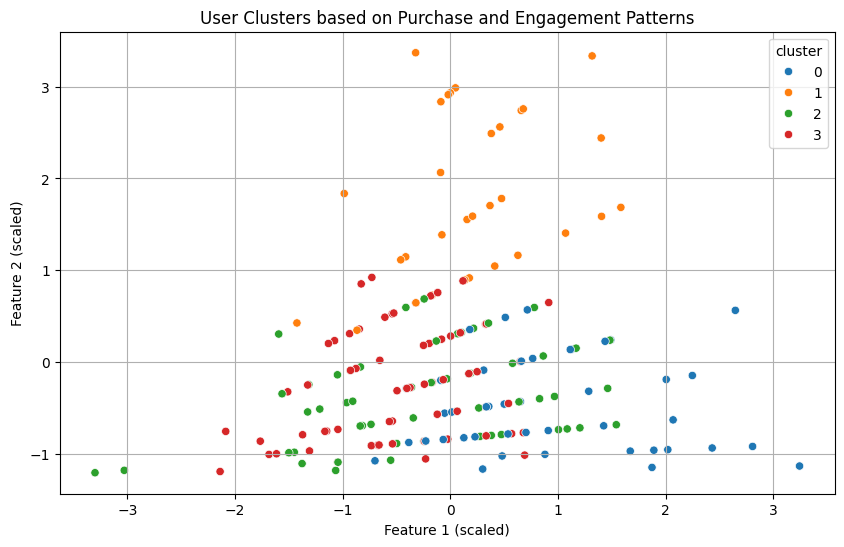

In [ ]:
# --- User Segmentation via Clustering ---
# Cluster users based on purchase behavior and promotion engagement timing

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate user features for clustering
user_features = data.groupby('customer_id').agg({
    'purchase_price': ['mean', 'sum', 'count'],
    'timestamp': 'min',
    'promotion_timestamp': 'min',
    'promotion_diff_hours': 'mean',
    'clicked': 'mean'
})

# Flatten multi-level column names
user_features.columns = ['_'.join(col).strip() for col in user_features.columns.values]
user_features.reset_index(inplace=True)

# Convert engagement timestamps to hour-of-day for timing patterns
user_features['purchase_hour'] = pd.to_datetime(user_features['timestamp_min']).dt.hour
user_features['promotion_hour'] = pd.to_datetime(user_features['promotion_timestamp_min']).dt.hour

# Select features for clustering
features_for_clustering = user_features[['purchase_price_mean', 'purchase_price_sum', 'purchase_price_count',
                                         'promotion_diff_hours_mean', 'clicked_mean', 'purchase_hour', 'promotion_hour']]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_clustering)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
user_features['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters (e.g. with first two principal features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=user_features['cluster'], palette='tab10')
plt.title('User Clusters based on Purchase and Engagement Patterns')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.grid(True)
plt.show()